In [10]:
import cv2
from pathlib2 import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

#### Импорт данных

In [8]:
def read_data(data_dir):
    data_path = Path(data_dir)
    astr_mask = data_path / '**'/ '**' / '**'/ '***.png' 
    file_names = glob(str(astr_mask))
    file_names.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    im_path_es = []
    for file_name in file_names:
        file_path = Path(file_name)
        name = file_path.stem
        if '_' in name:
            name_parts = name.split('_')
        name = file_name.split('\\')
        im_path = file_name
        im_path_es.append(im_path)
    df_all = pd.DataFrame({
        'file_path': im_path_es})
    return df_all

In [19]:
df_all = read_data(data_dir = r'C:/nn/Task_Astrocytes/Task_Astrocytes')

In [55]:
df_all

file_path
0     C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
1     C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
2     C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
3     C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
4     C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
...                                                 ...
3597  C:\nn\Task_Astrocytes\Task_Astrocytes\2016-05-...
3598  C:\nn\Task_Astrocytes\Task_Astrocytes\2016-05-...
3599  C:\nn\Task_Astrocytes\Task_Astrocytes\2016-05-...
3600  C:\nn\Task_Astrocytes\Task_Astrocytes\2016-05-...
3601  C:\nn\Task_Astrocytes\Task_Astrocytes\2016-05-...

[3602 rows x 1 columns]

In [20]:
def part_of_df_all(df_all,  v_record):
    v_record = df_all[df_all.file_path.str.contains(f'{v_record}')]
    pathes_of_images_list = v_record[v_record.file_path.str.contains('event')]
    pathes_of_images_list = pathes_of_images_list['file_path'].values
    return pathes_of_images_list

In [21]:
pathes_of_images_list = part_of_df_all(df_all, v_record = 'tser2')

6.6. двумерная гистограмма: для каждого пикселя количество моментов времени, когда он начинал гореть (то есть смена значения пикселя с 0 на 1).

In [6]:
def count_hist(pathes_of_images_list):
    array = pathes_of_images_list[0].split('\\')
    title = array[5]
    I = cv2.imread(str(pathes_of_images_list[0]))
    img1 = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    Mo = np.zeros(img1.shape)
    for i in range(len(pathes_of_images_list) - 1):
        I = cv2.imread(str(pathes_of_images_list[i]))
        img1 = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
        img1[img1 >= 1] = 1
        M = cv2.imread(str(pathes_of_images_list[i+1]))
        img2 = cv2.cvtColor(M, cv2.COLOR_BGR2GRAY)
        img2[img2 >= 1] = 1
        M = img2 - img1
        M[M ==  255] = 0
        Mo = Mo + M
    return Mo, title
def D2_histogfamm(Mo, title):
    h, w = Mo.shape[0], Mo.shape[1]
    hist = plt.figure(figsize=(6.5,3.37))
    print(type(hist))
    plt.title(f'{title}')
    plt.gca().invert_yaxis()
    plt.plot([w - 71, w - 20], [h - 20, h - 20], color='w', linewidth=1)
    plt.text(w - 75, h-25, '10 $\mu$m', color = 'w', style='italic', size='small')
    plt.imshow(Mo, cmap = 'gray')
    cbar = plt.colorbar(label= "Количество смен значения пикселя", orientation="vertical",shrink=.75)
    return hist

<class 'matplotlib.figure.Figure'>


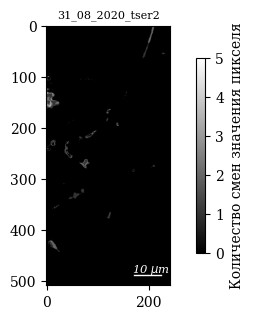

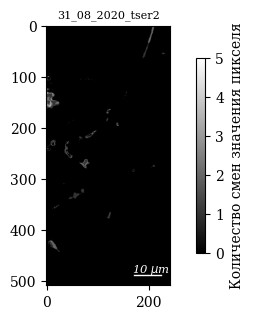

In [22]:
D2_histogfamm(Mo = count_hist(pathes_of_images_list)[0], title = count_hist(pathes_of_images_list)[1])

In [33]:
type()

numpy.ndarray

#### Визуализация зависимости площади самой большой области в зависимости от номера кадра.


In [27]:
def count_Sq_max(pathes_of_images_list):
    maximum_S = []
    for i in range(len(pathes_of_images_list)):
        I = cv2.imread(str(pathes_of_images_list[i]))
        img1 = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
        ret,thresh_img = cv2.threshold(img1, 200, 255, cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        areas = []
        for j in range(len(contours)):
            area = cv2.contourArea(contours[j])
            size = area * (1/5.1) ** 2 # 5.1 pixel = 1 mkm
            areas.append(round(size, 3))
        max_area = max(areas)
        maximum_S.append(max_area)    
    return maximum_S

In [75]:
def plot(maximum_S, title):
    t = np.arange(0, len(maximum_S))/2
    plt.rcParams['font.family'] = 'serif'
    PLOT = plt.figure(figsize = (6.5, 3.37), dpi = 300.0)
    plt.rc('axes', titlesize =  8) 
    plt.title("Зависимость площади самой большой области от номера кадра ")
    plt.plot(t, maximum_S, '#FF0055', linewidth = 2, label = f'{title}')
    plt.ylabel('Площадь (S), $\mu$m$^2$')
    plt.legend()
    plt.xlabel('Время t, мин')
    plt.grid(which = 'major')
    plt.grid(which = 'minor')
    plt.minorticks_on()
    df = []
    for i in range(len(t)):
        if t[i] % 60 == 0:
            df.append(int(t[i]//60))
    plt.xticks (ticks=np.arange(min(t), max(t), 60.0), labels=df) 
    plt.show()
    return PLOT

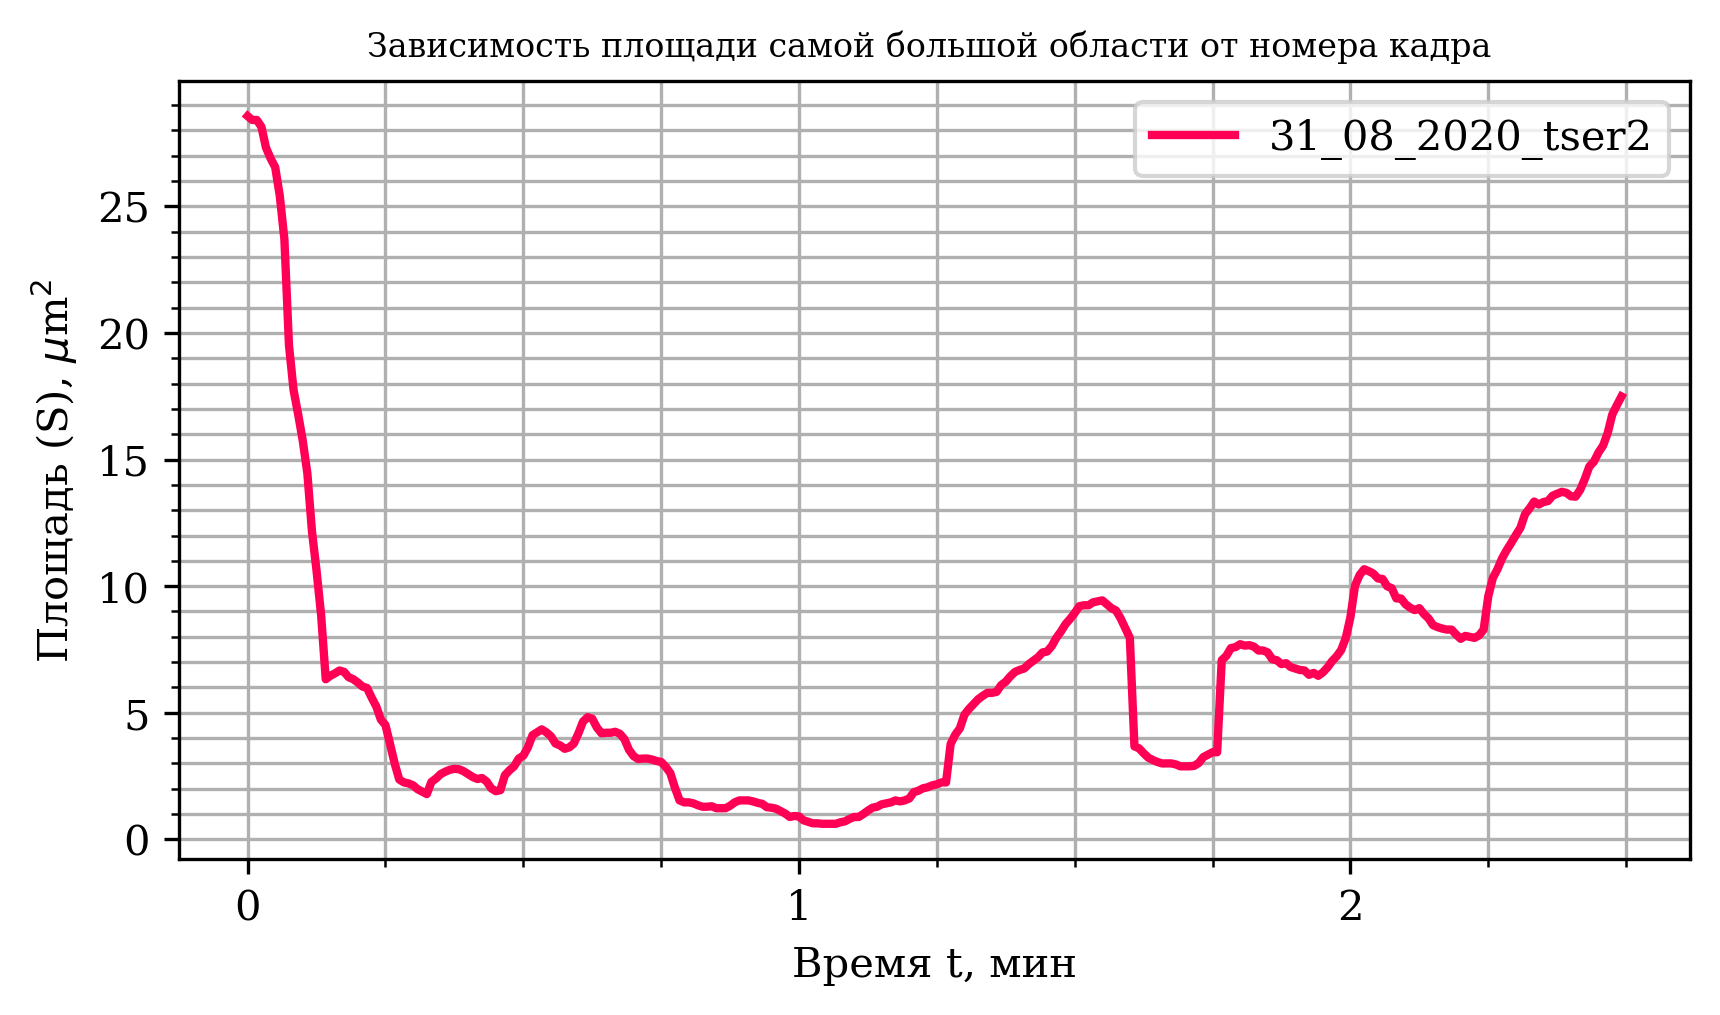

In [50]:
plot(maximum_S=count_Sq_max(pathes_of_images_list), title = count_hist(pathes_of_images_list)[1])

#### Сохранение данных (из 6.9)

In [51]:
def onerecord_table(maximum_S, pathes_of_images_list, data_dir):
    data_path = Path(data_dir)
    array = pathes_of_images_list[0].split('\\')
    title = array[5]
    table_for_part = pd.DataFrame({
        'Square_max, кв. мкм': maximum_S, 'file_path': pathes_of_images_list})
    table_for_part.to_excel(data_path /f'{title}.xlsx', index= False )


In [53]:
onerecord_table(maximum_S=count_Sq_max(pathes_of_images_list), pathes_of_images_list = pathes_of_images_list, data_dir= r'C:\Users\sibir\Desktop\results\table')


#### Сохранение гистограмм и графиков в png - формате

In [70]:
def save_hist(pathes_of_images_list, data_dir):
    data_path = Path(data_dir)
    array = pathes_of_images_list[0].split('\\')
    title = array[5]
    file_location_png = data_path / f'{title}_hist.png'
    hist = D2_histogfamm(Mo = count_hist(pathes_of_images_list)[0], title = count_hist((pathes_of_images_list))[1])
    hist.savefig(file_location_png, dpi=300, bbox_inches='tight')

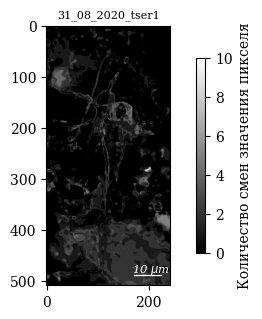

In [72]:
save_hist(pathes_of_images_list=part_of_df_all(df_all, v_record='tser1'), data_dir= r'C:/Users/sibir/Desktop/results/hist')

In [73]:
def save_plt(pathes_of_images_list, data_dir):
    data_path = Path(data_dir)
    array = pathes_of_images_list[0].split('\\')
    title = array[5]
    PLOT = plot(maximum_S=count_Sq_max(pathes_of_images_list), title= count_hist(pathes_of_images_list)[1])
    file_location_png = data_path / f'{title}_plot.png'
    PLOT.savefig(file_location_png, dpi=300, bbox_inches='tight')

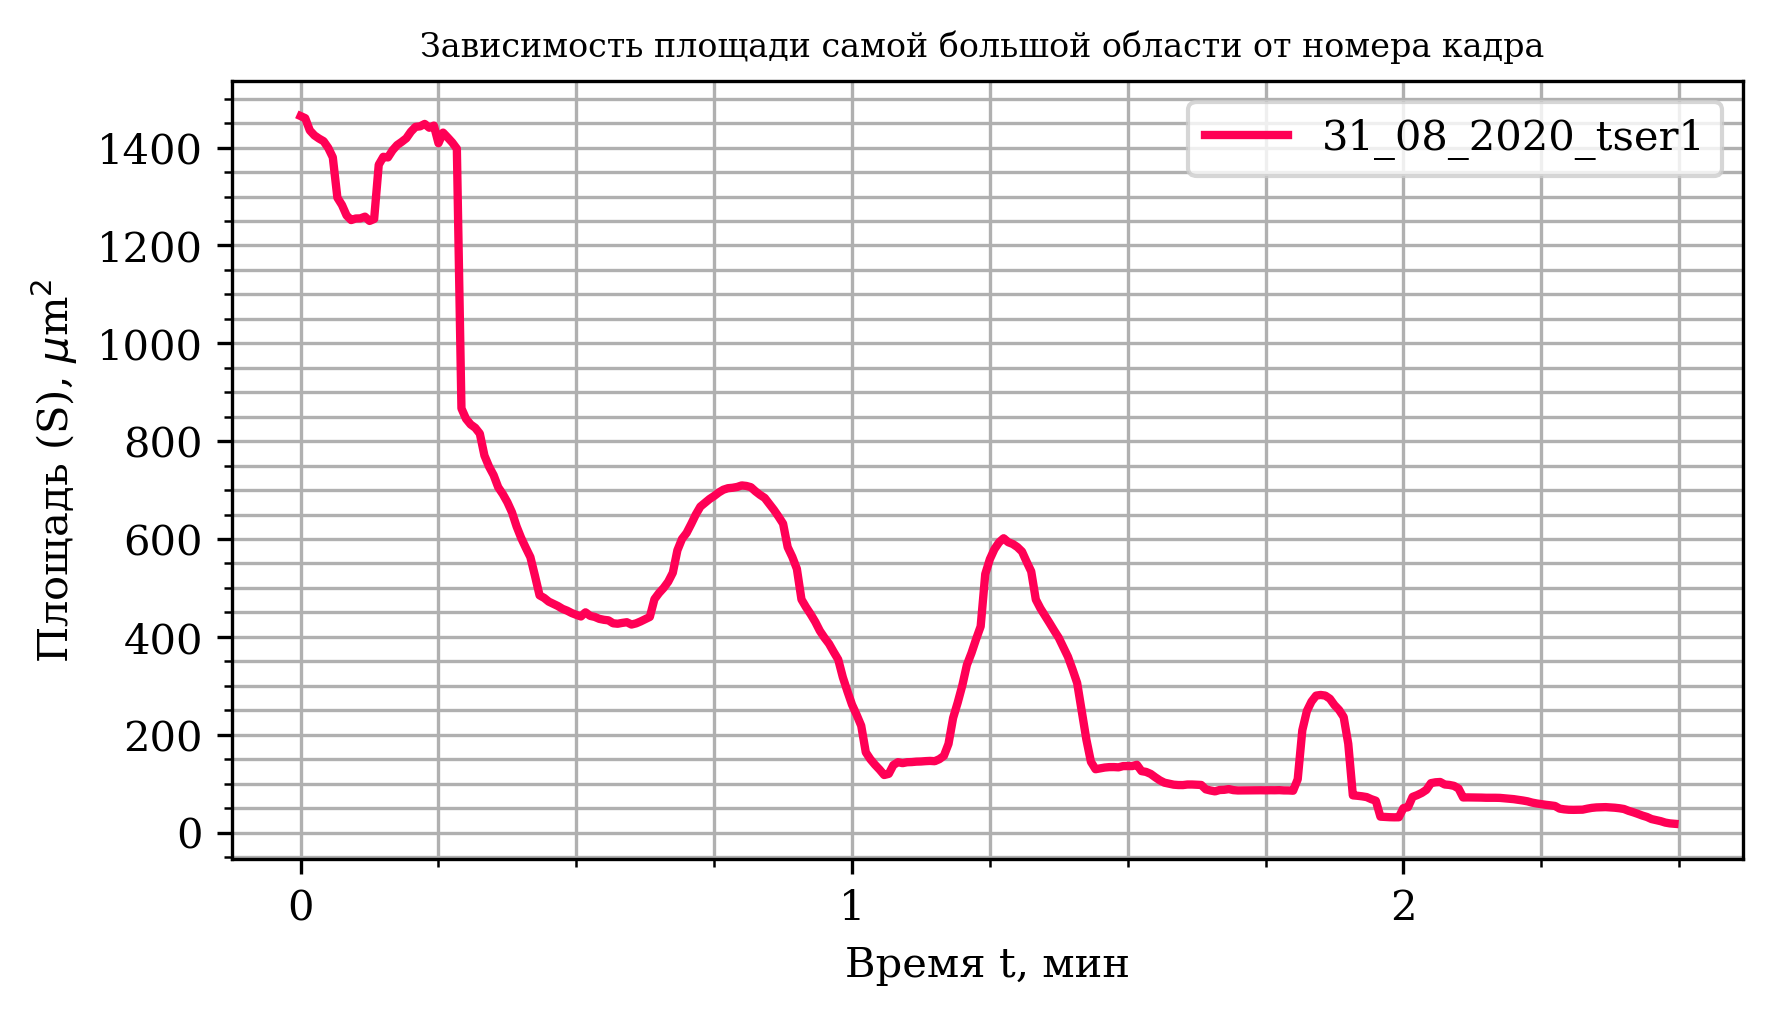

In [76]:
save_plt(pathes_of_images_list=part_of_df_all(df_all, v_record = 'tser1'), data_dir = r'C:/Users/sibir/Desktop/results/plot')


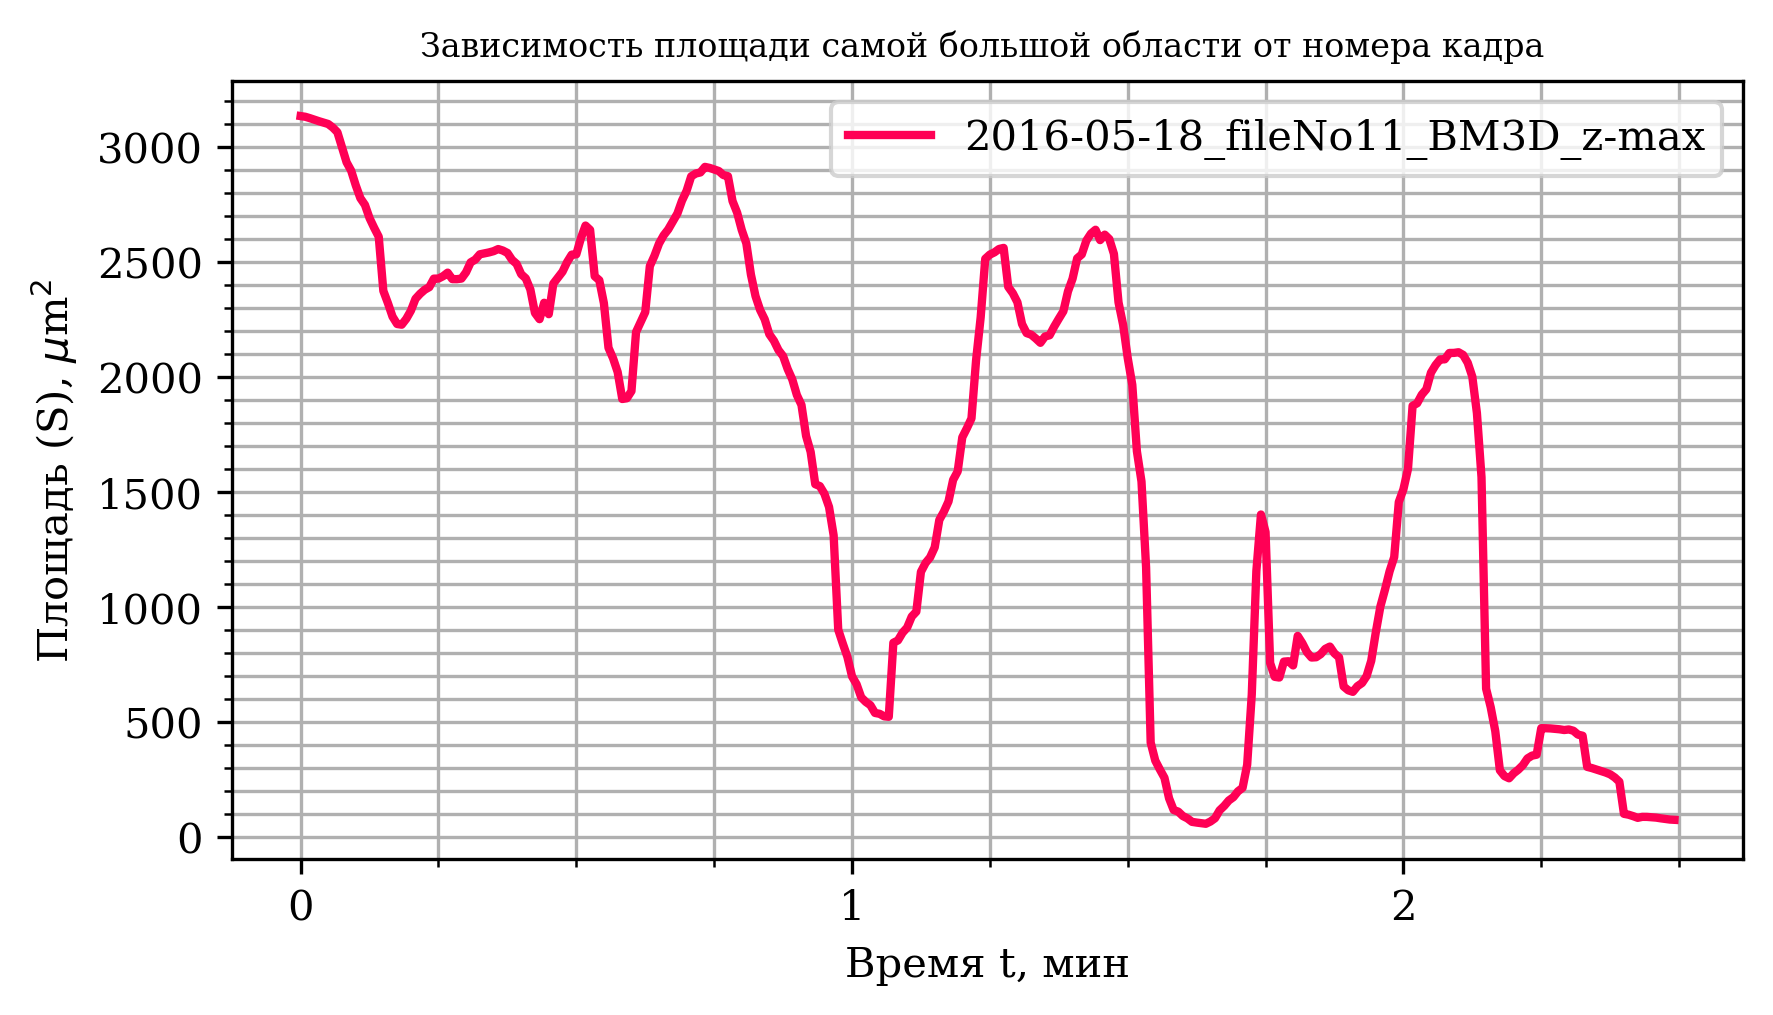

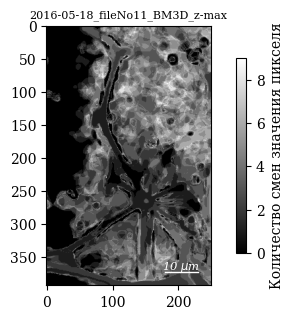

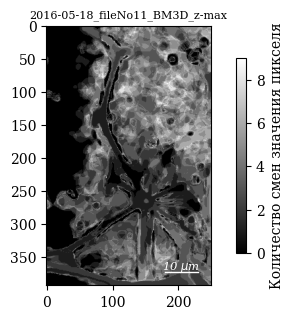

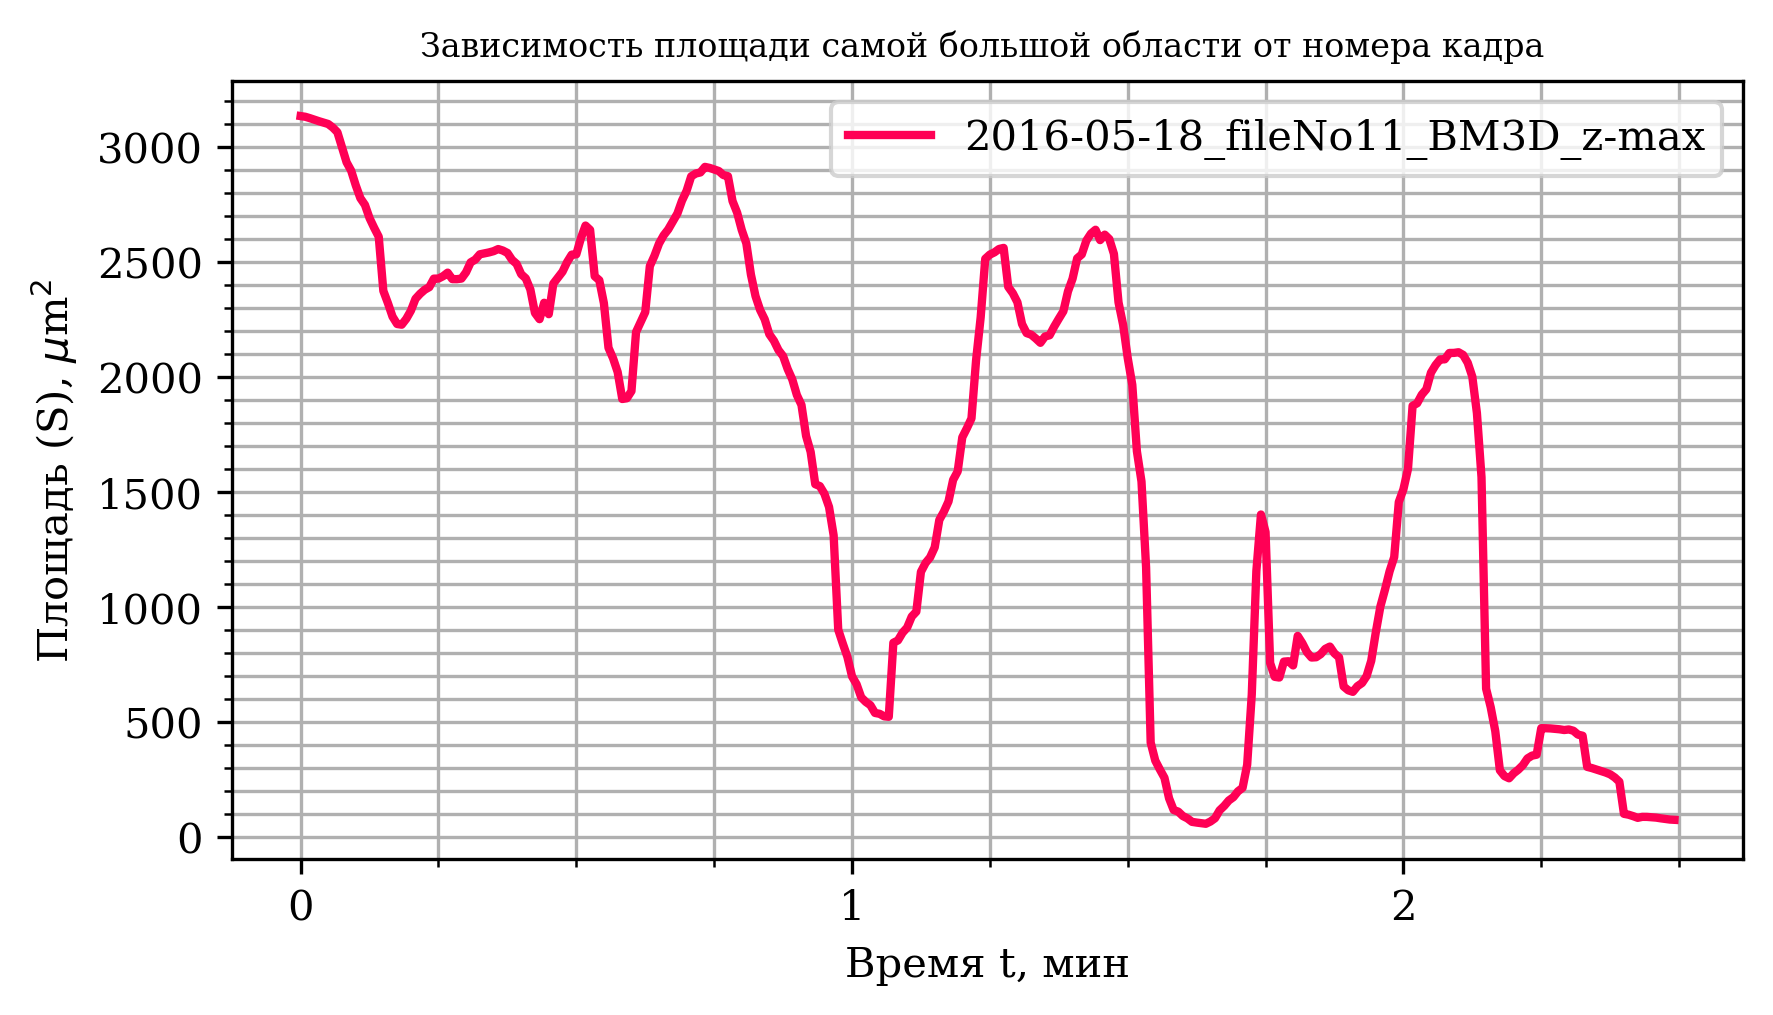

In [80]:
def func8(pathes_of_images_list):
    onerecord_table(maximum_S=count_Sq_max(pathes_of_images_list), pathes_of_images_list = pathes_of_images_list, data_dir = r'C:/Users/sibir/Desktop/results/table')
    plot(maximum_S = count_Sq_max(pathes_of_images_list), title = count_hist(pathes_of_images_list)[1])
    D2_histogfamm(Mo = count_hist(pathes_of_images_list)[0], title=count_hist(pathes_of_images_list)[1])
    save_hist(pathes_of_images_list, data_dir = r'C:/Users/sibir/Desktop/results/hist')
    save_plt(pathes_of_images_list, data_dir = r'C:/Users/sibir/Desktop/results/plot')
func8(pathes_of_images_list = part_of_df_all(df_all, v_record='2016-05-18'))

In [77]:
def type_videorecords(df_ev):
    df1 = df_ev[df_ev.file_path.str.contains('tser1')]
    df2 = df_ev[df_ev.file_path.str.contains('tser2')]
    df3 = df_ev[df_ev.file_path.str.contains('tser3')]
    df4 = df_ev[df_ev.file_path.str.contains('tser4')]
    df5 = df_ev[df_ev.file_path.str.contains('2016-05-18')] 
    df6 = df_ev[df_ev.file_path.str.contains('2016-05-26')]
    return df1, df2, df3, df4, df5, df6

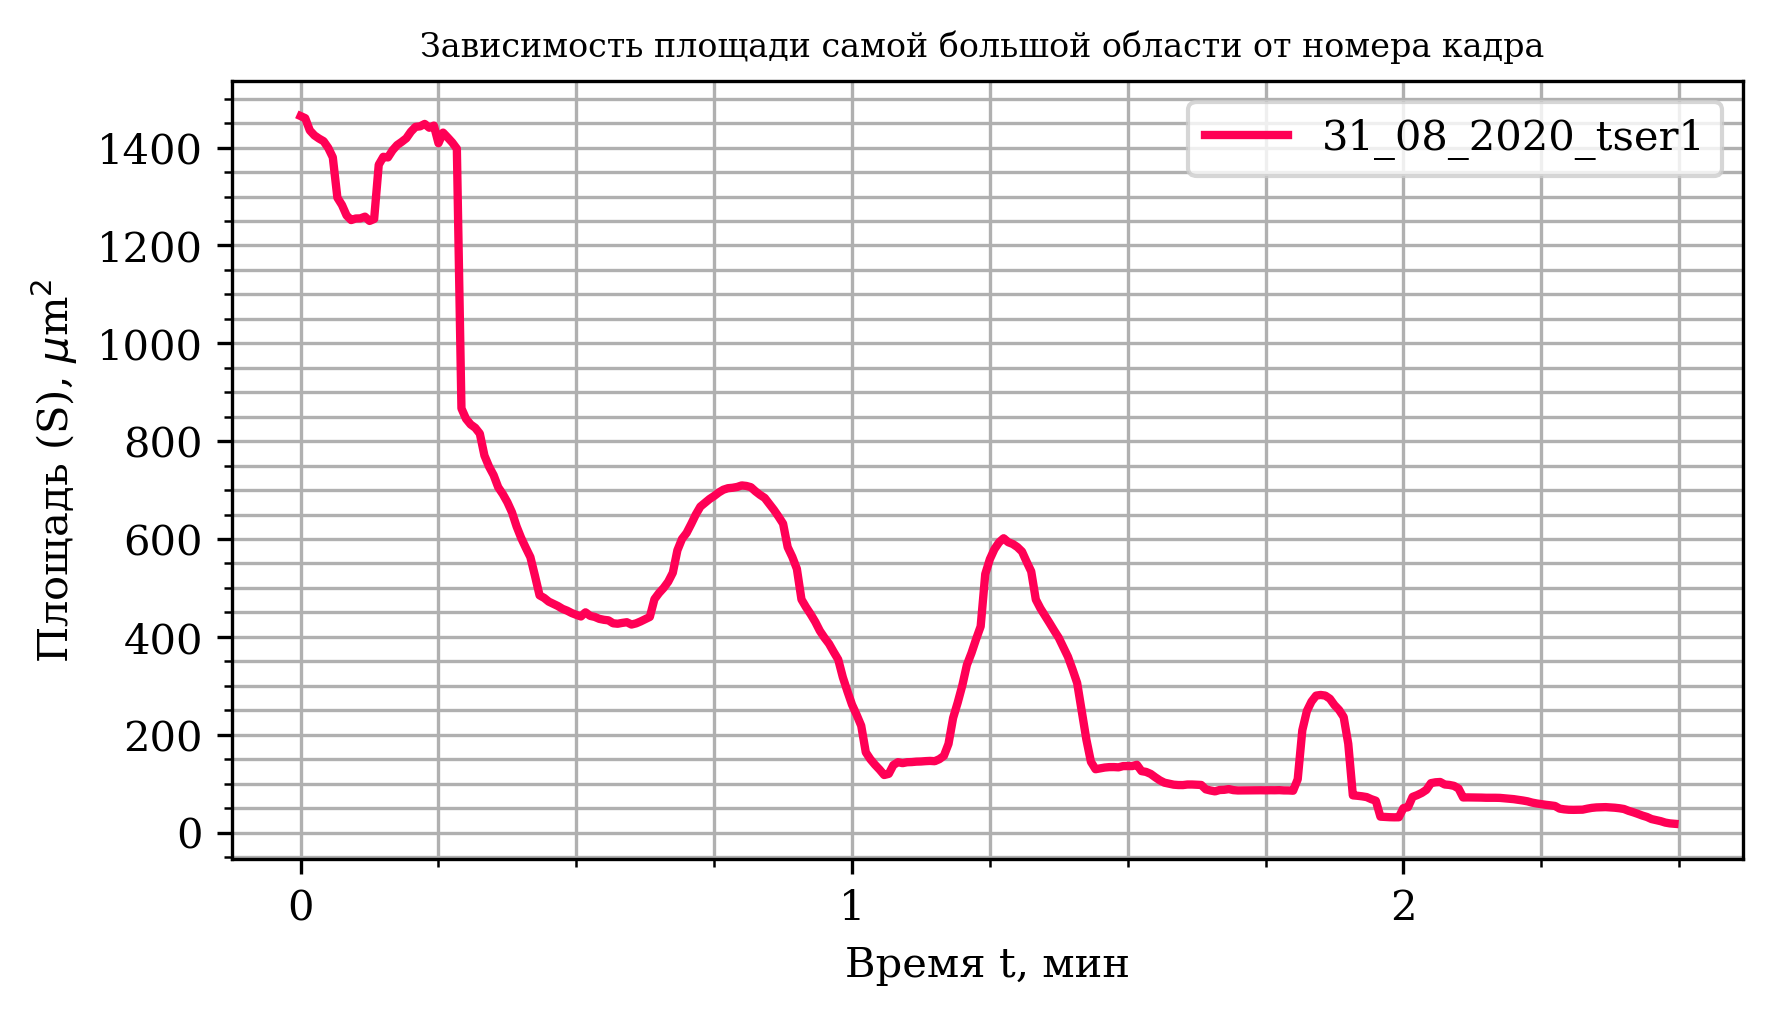

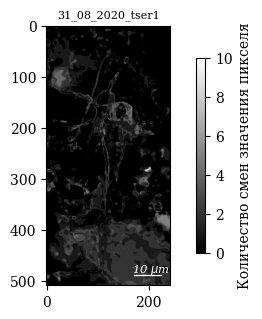

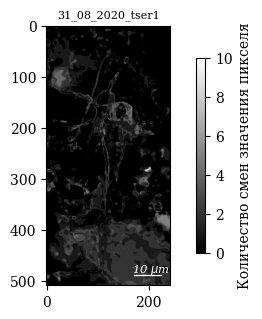

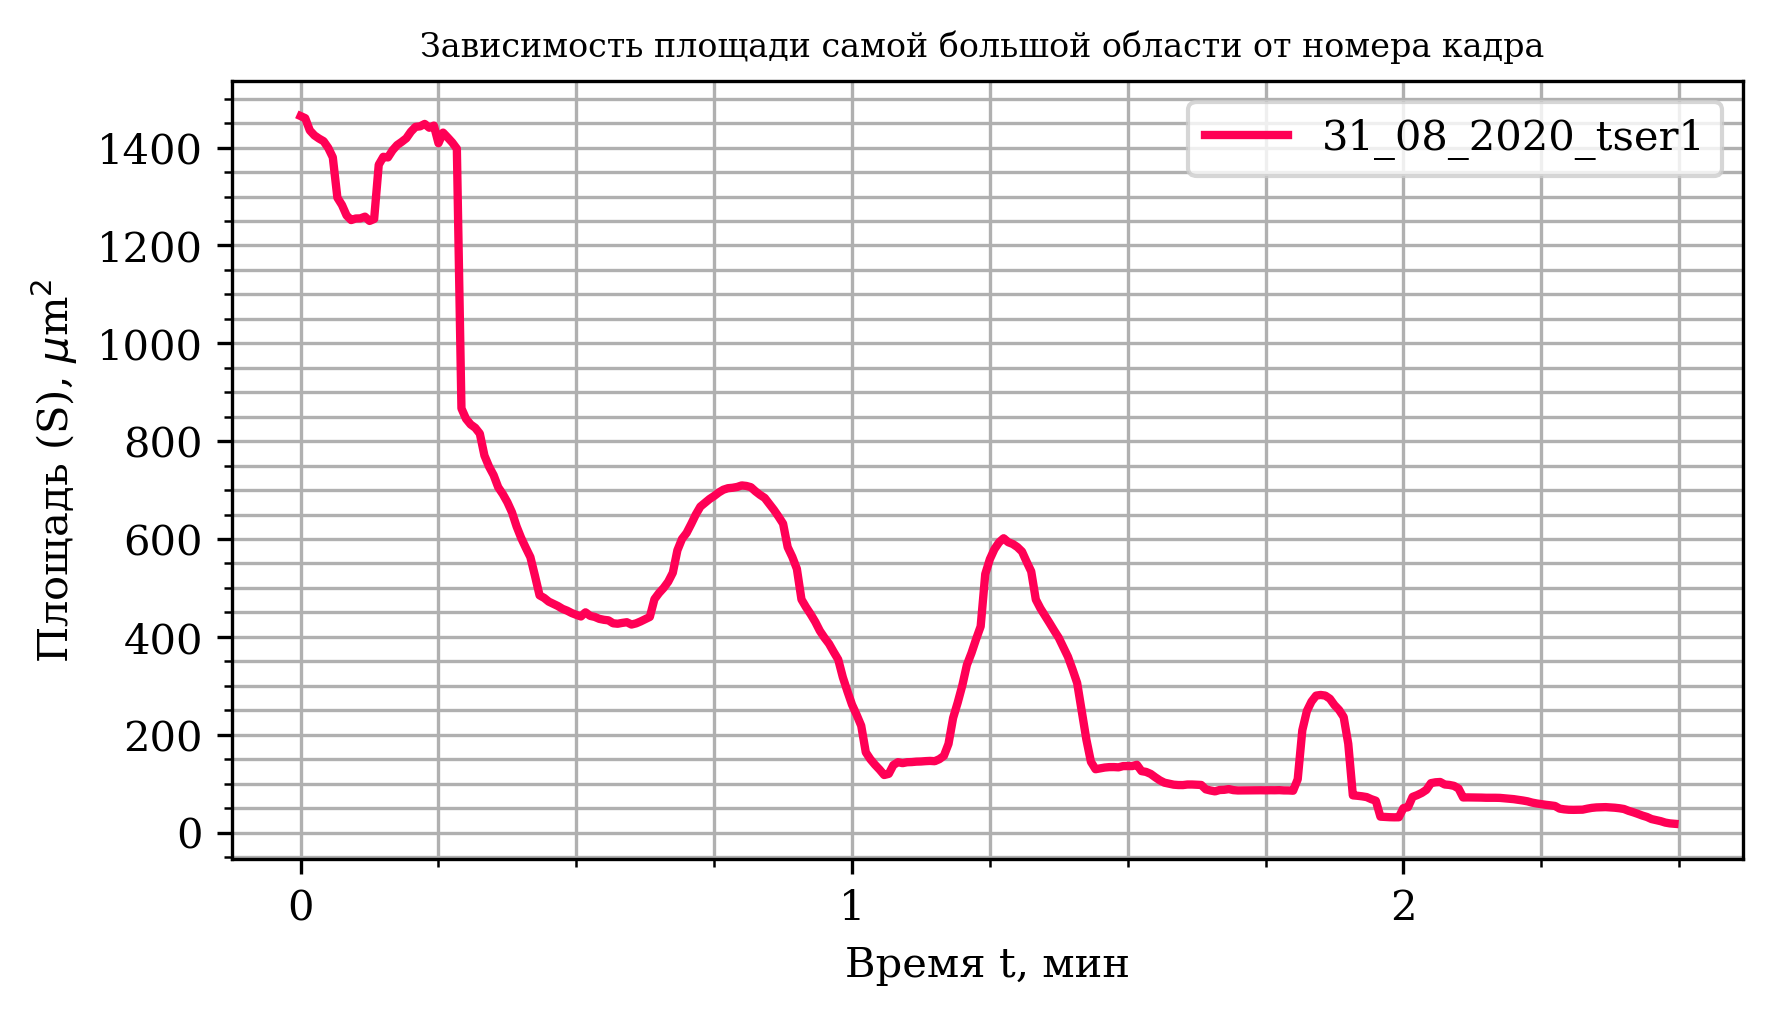

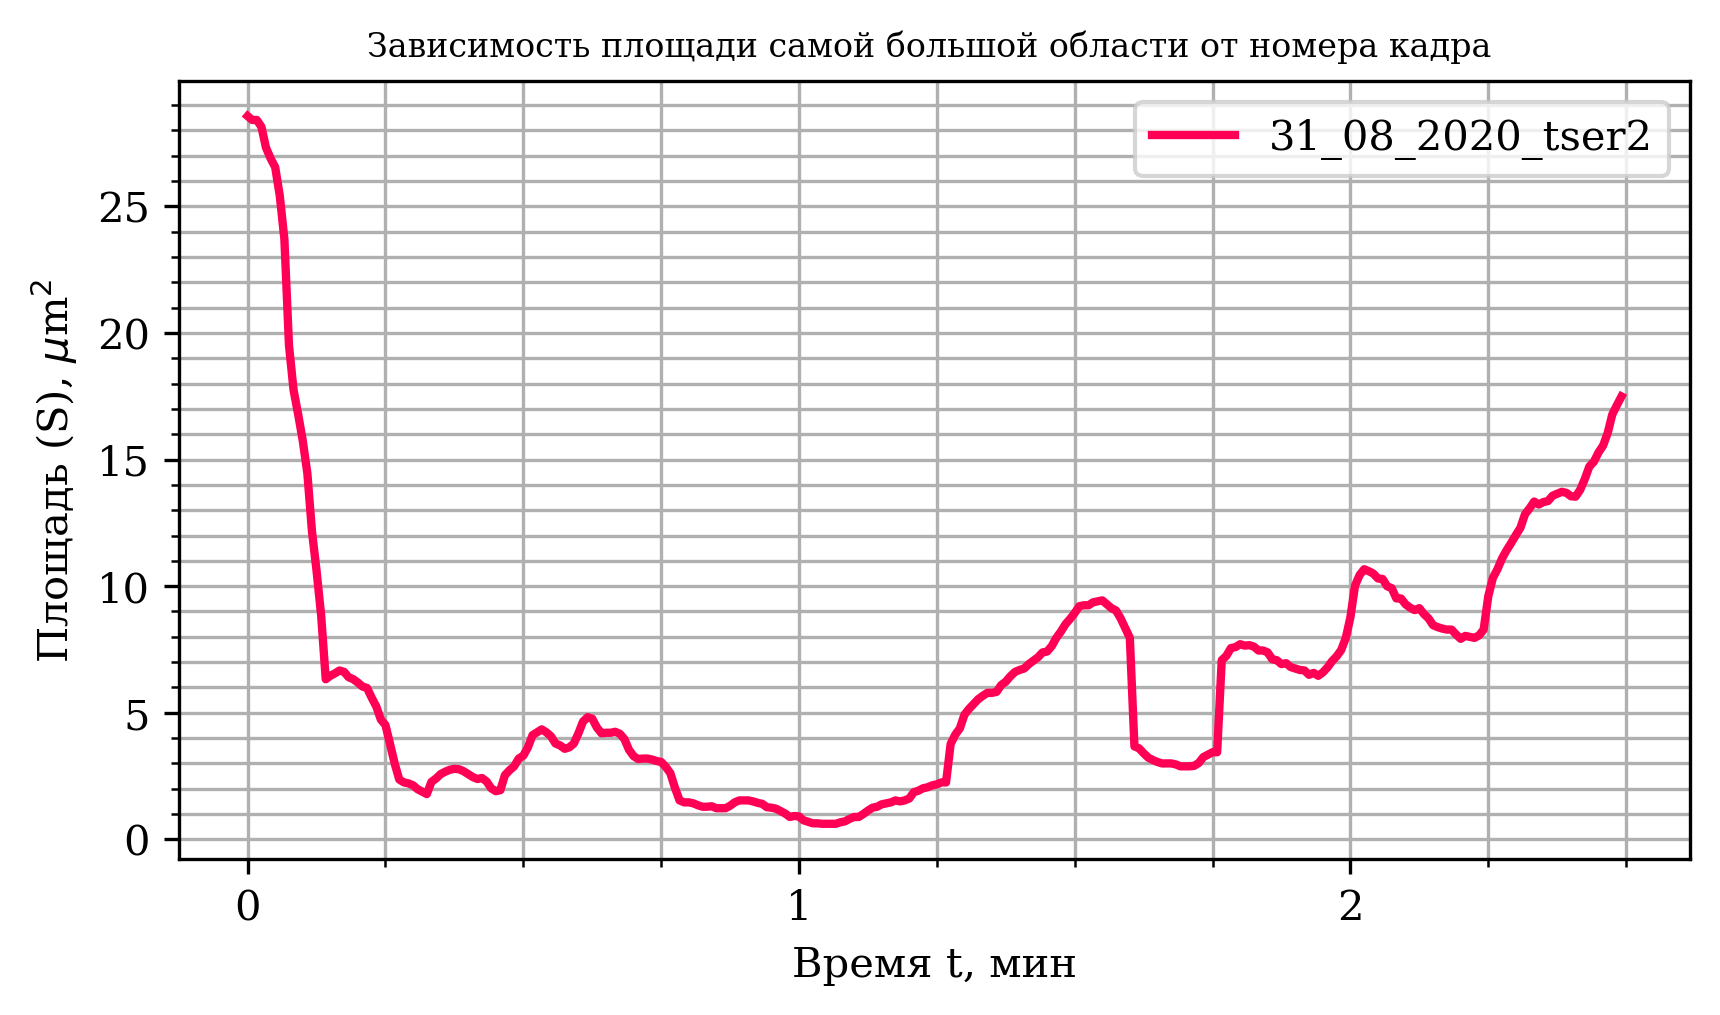

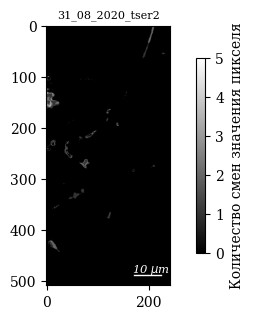

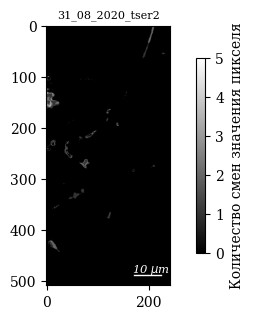

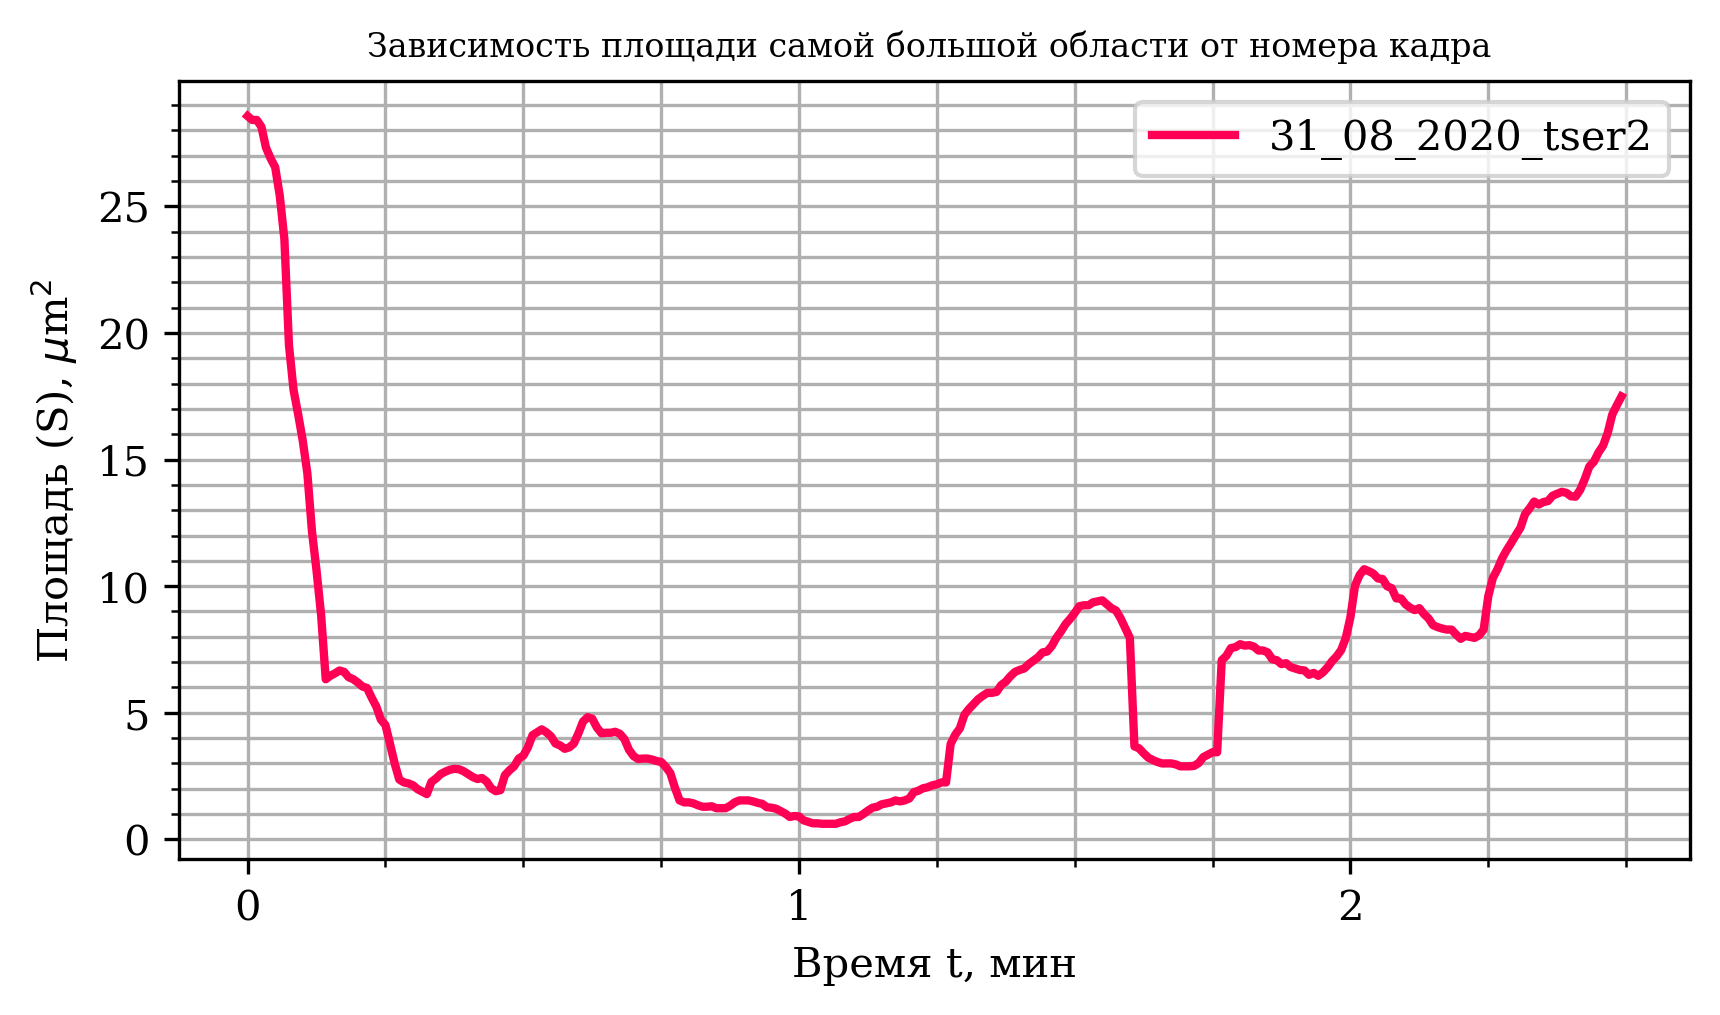

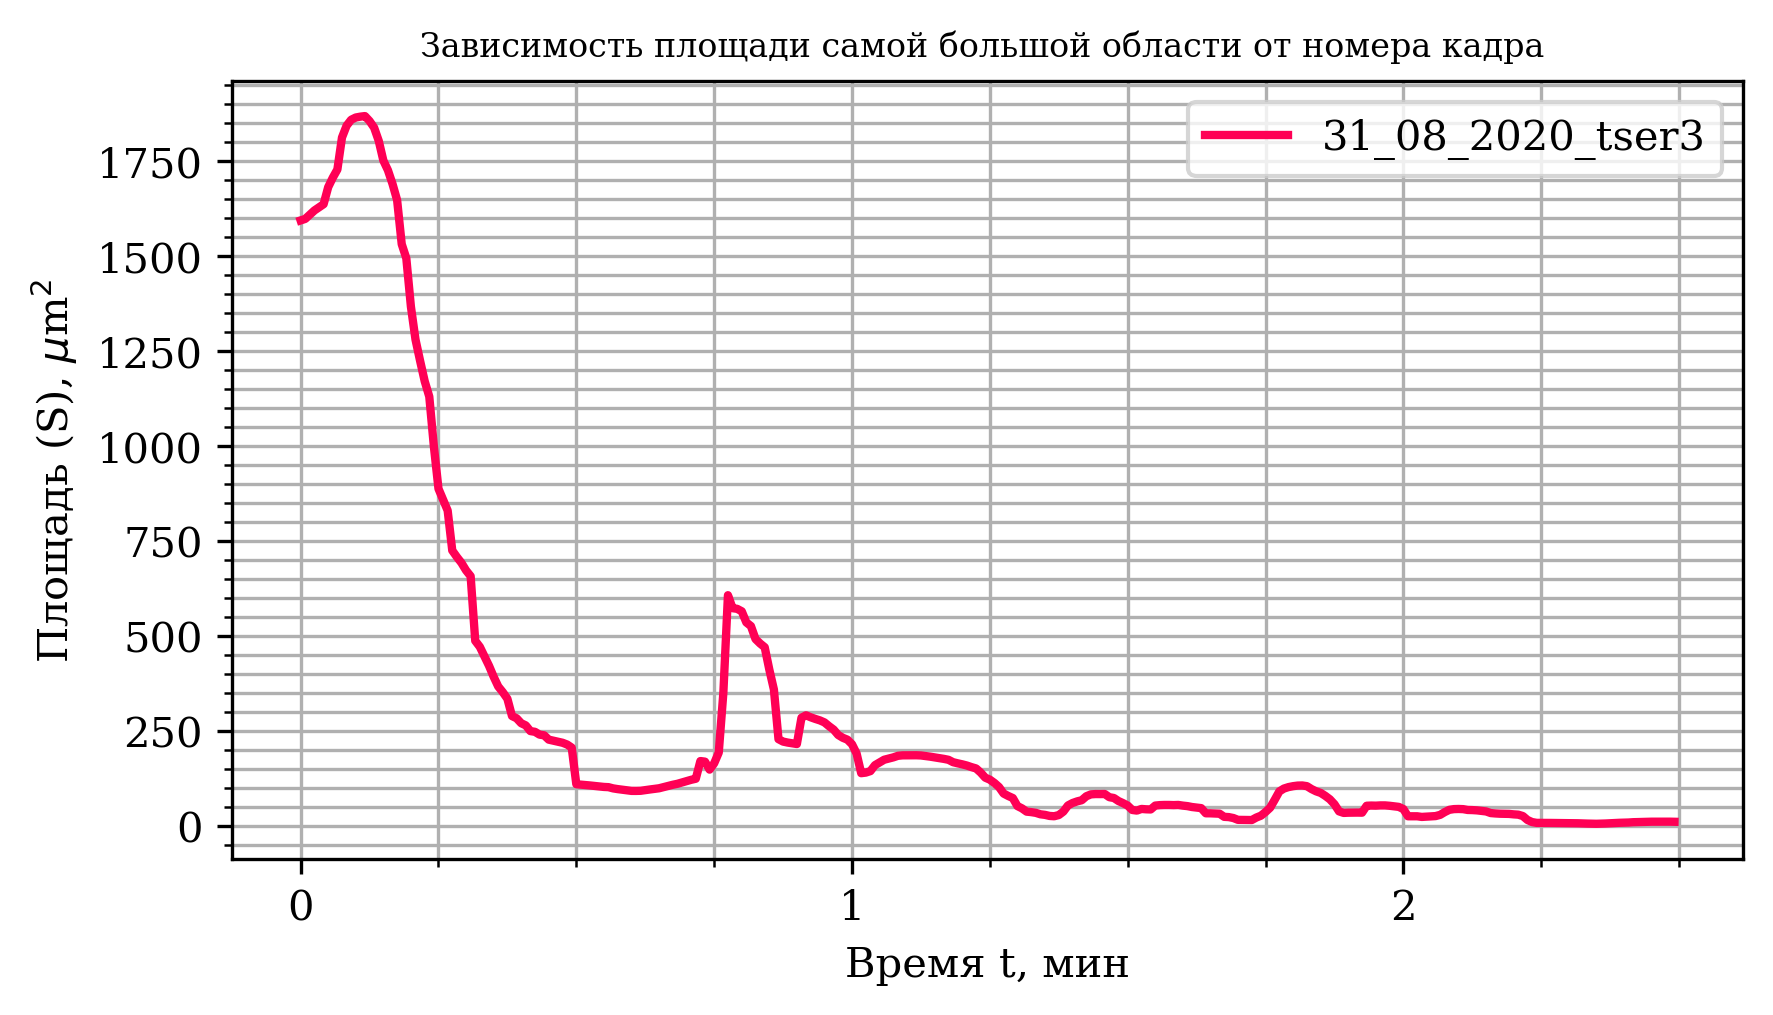

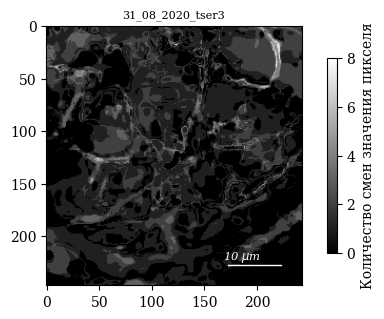

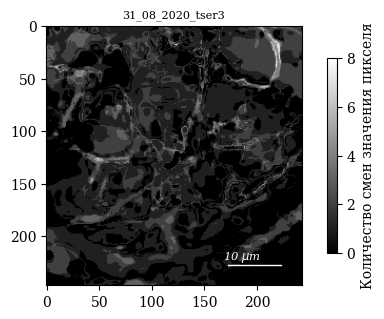

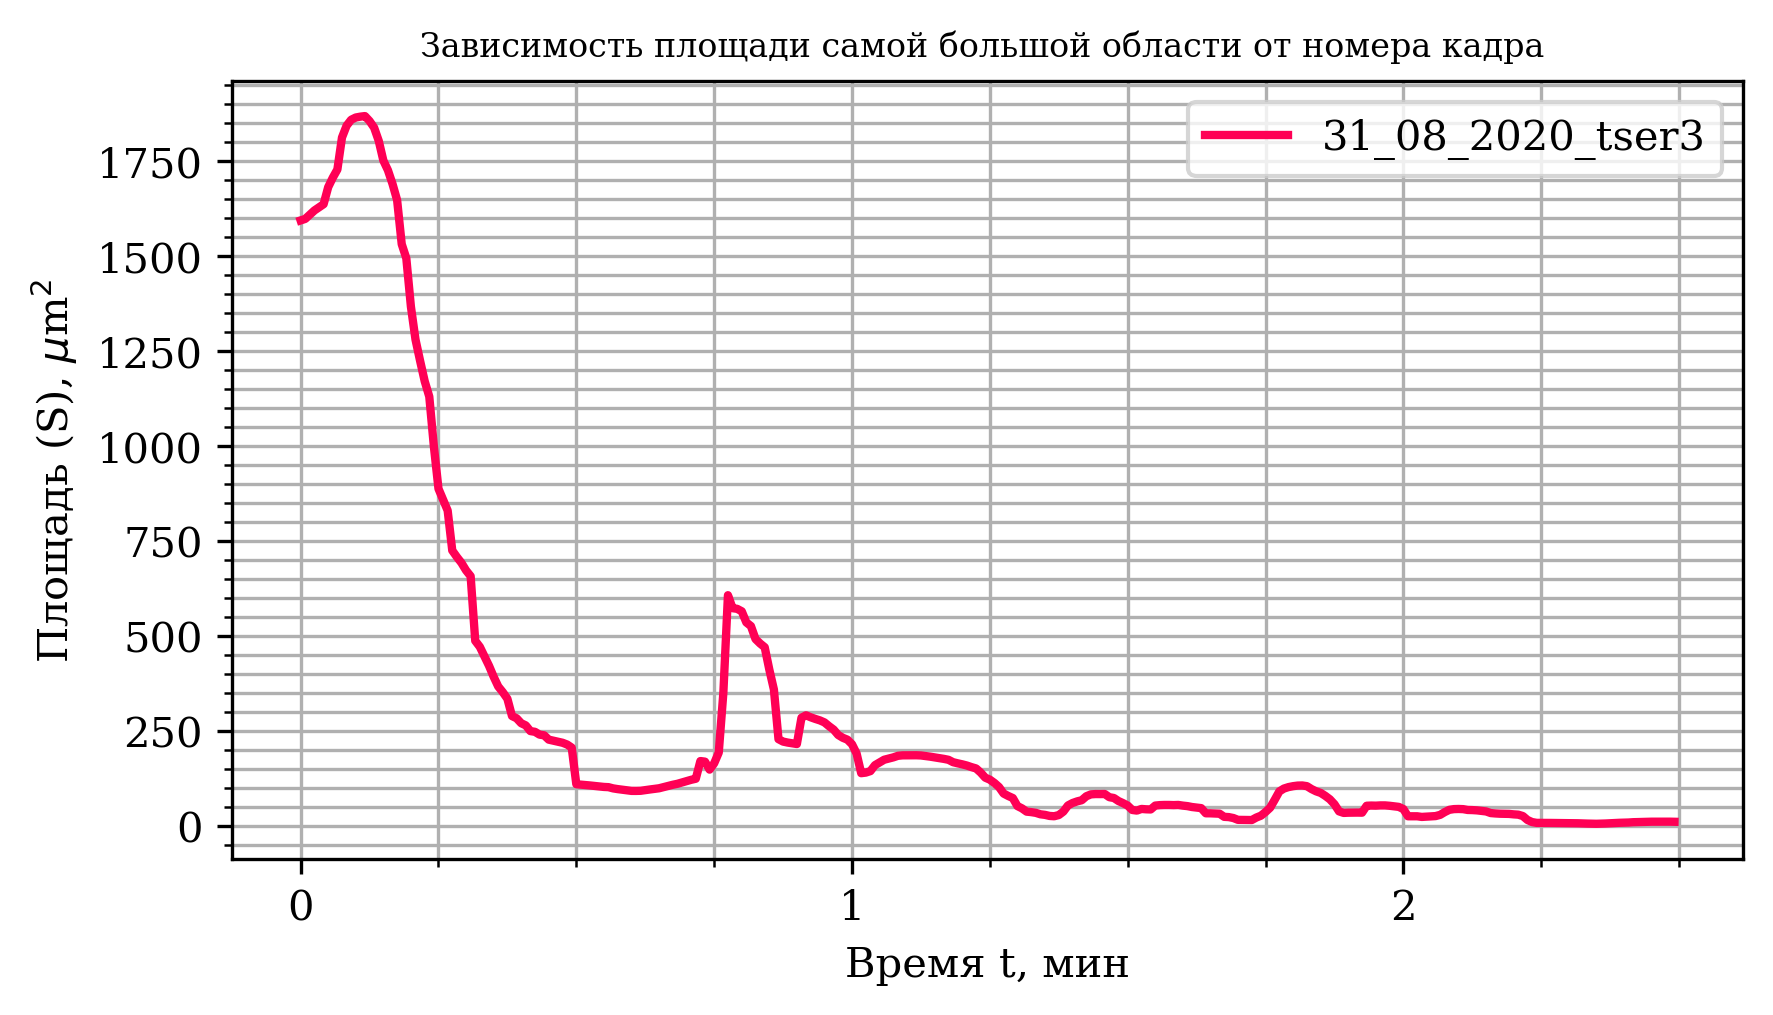

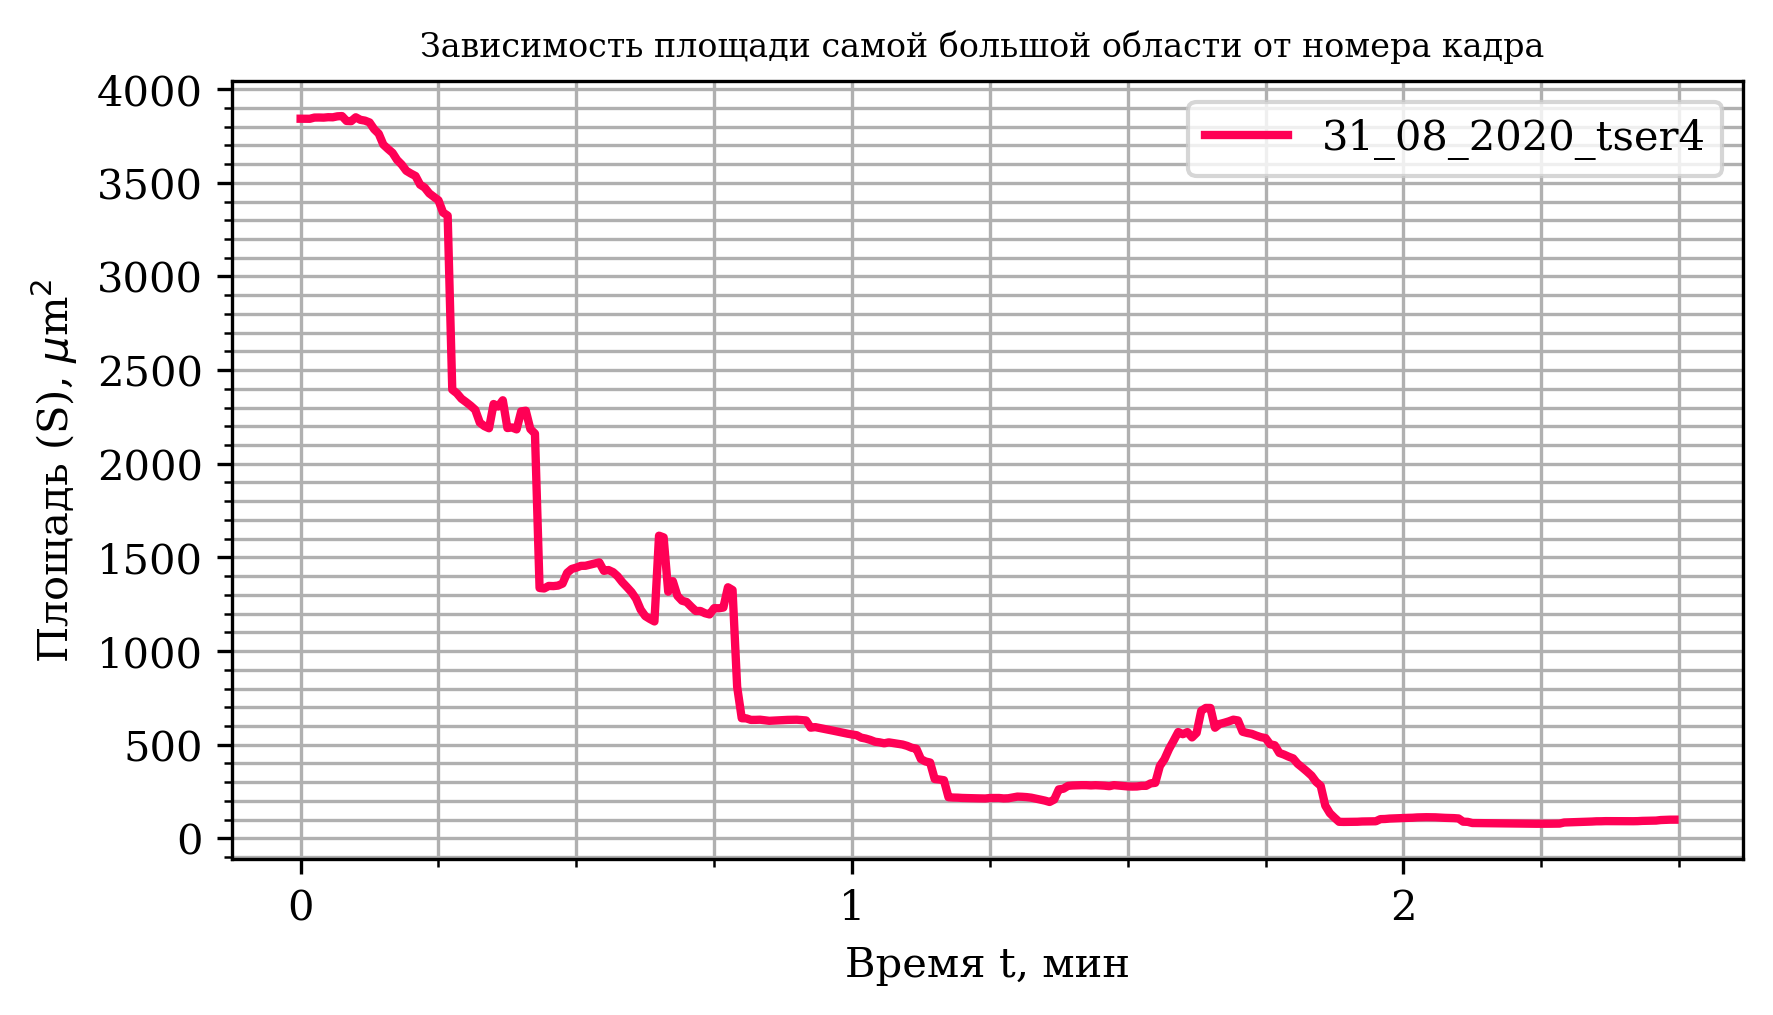

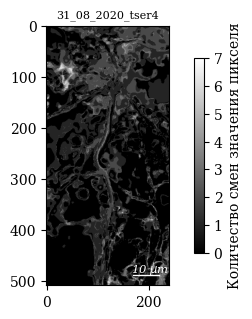

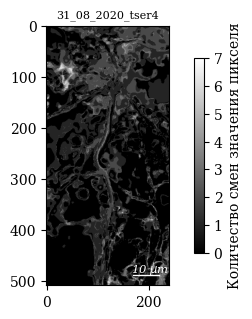

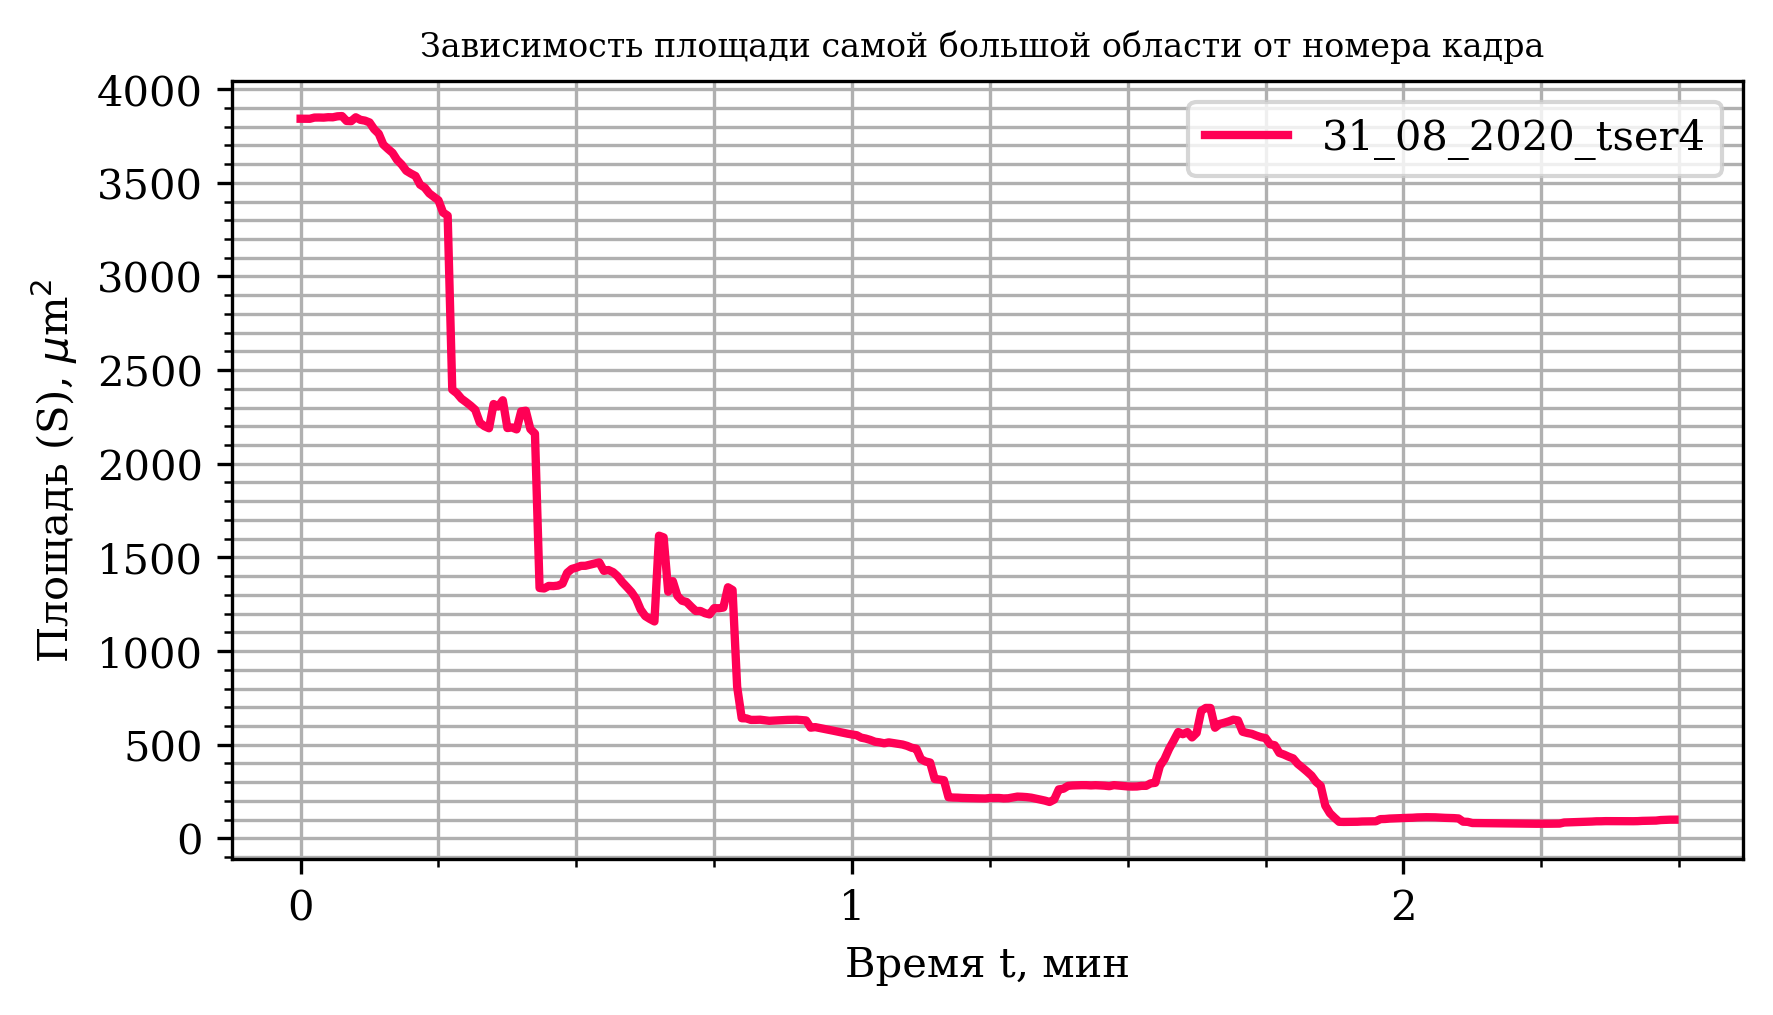

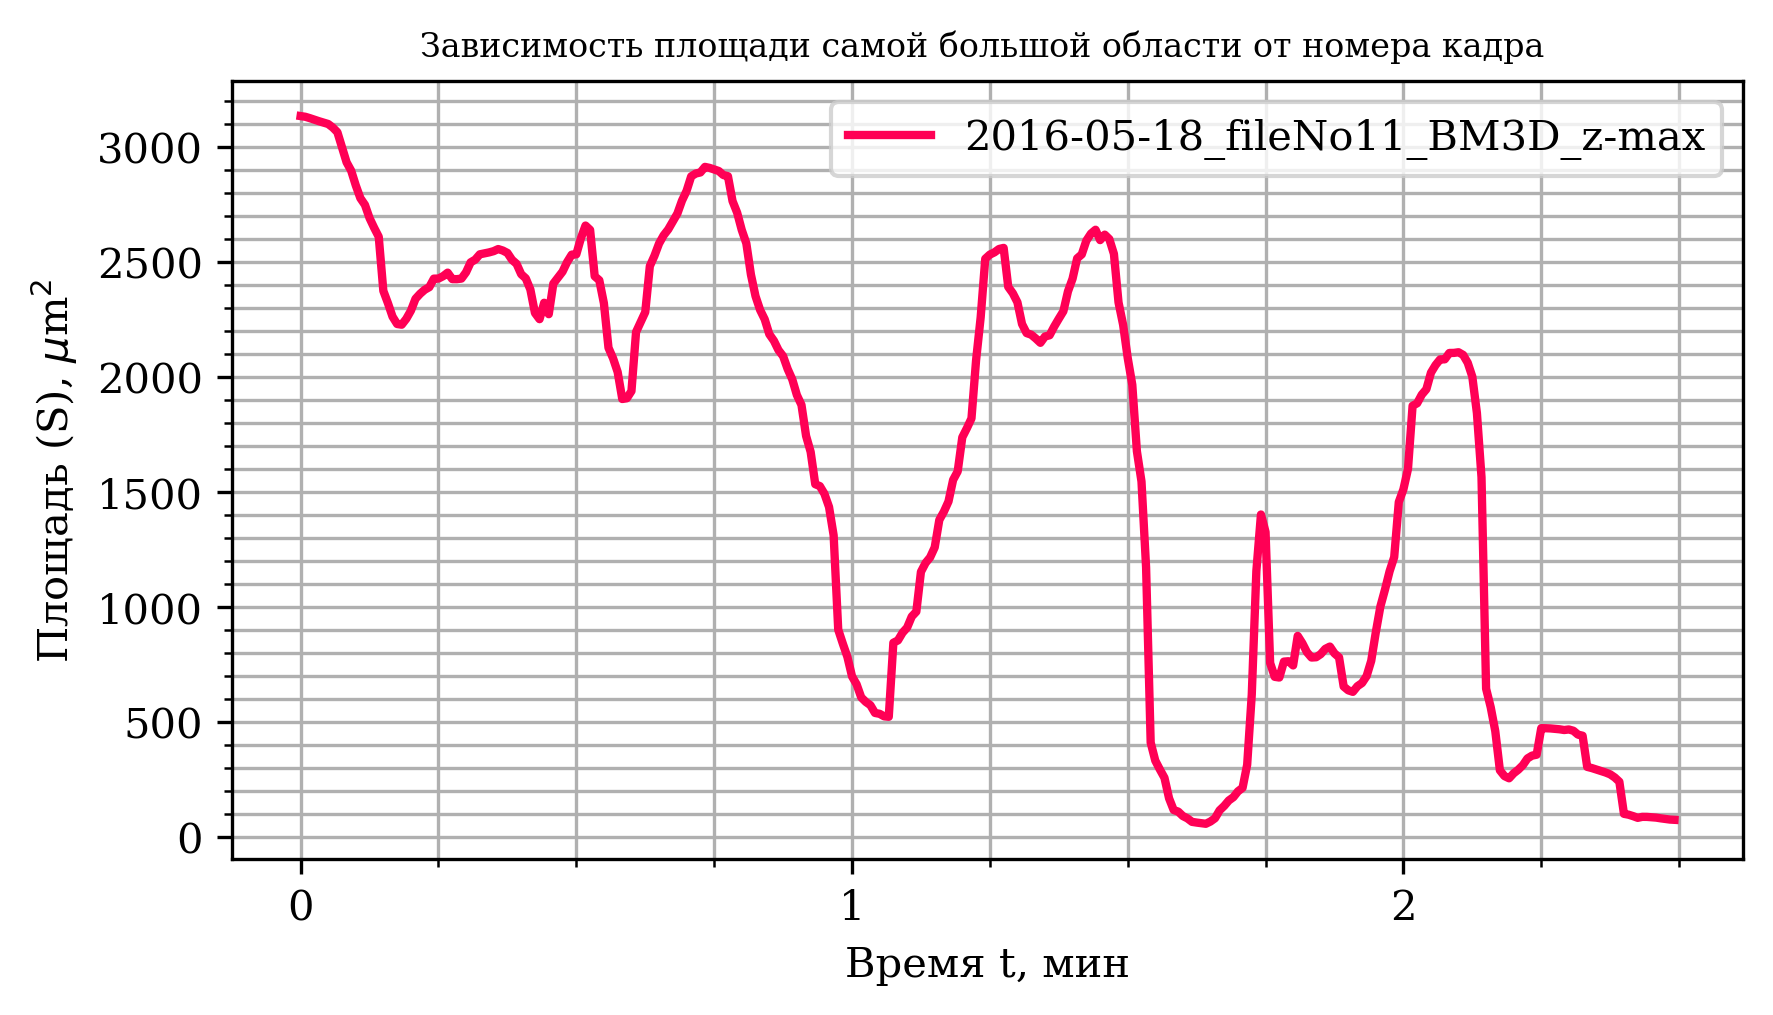

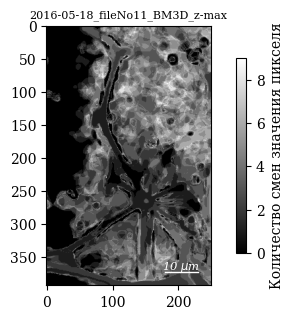

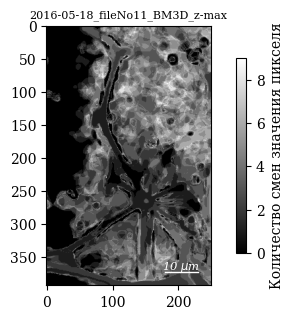

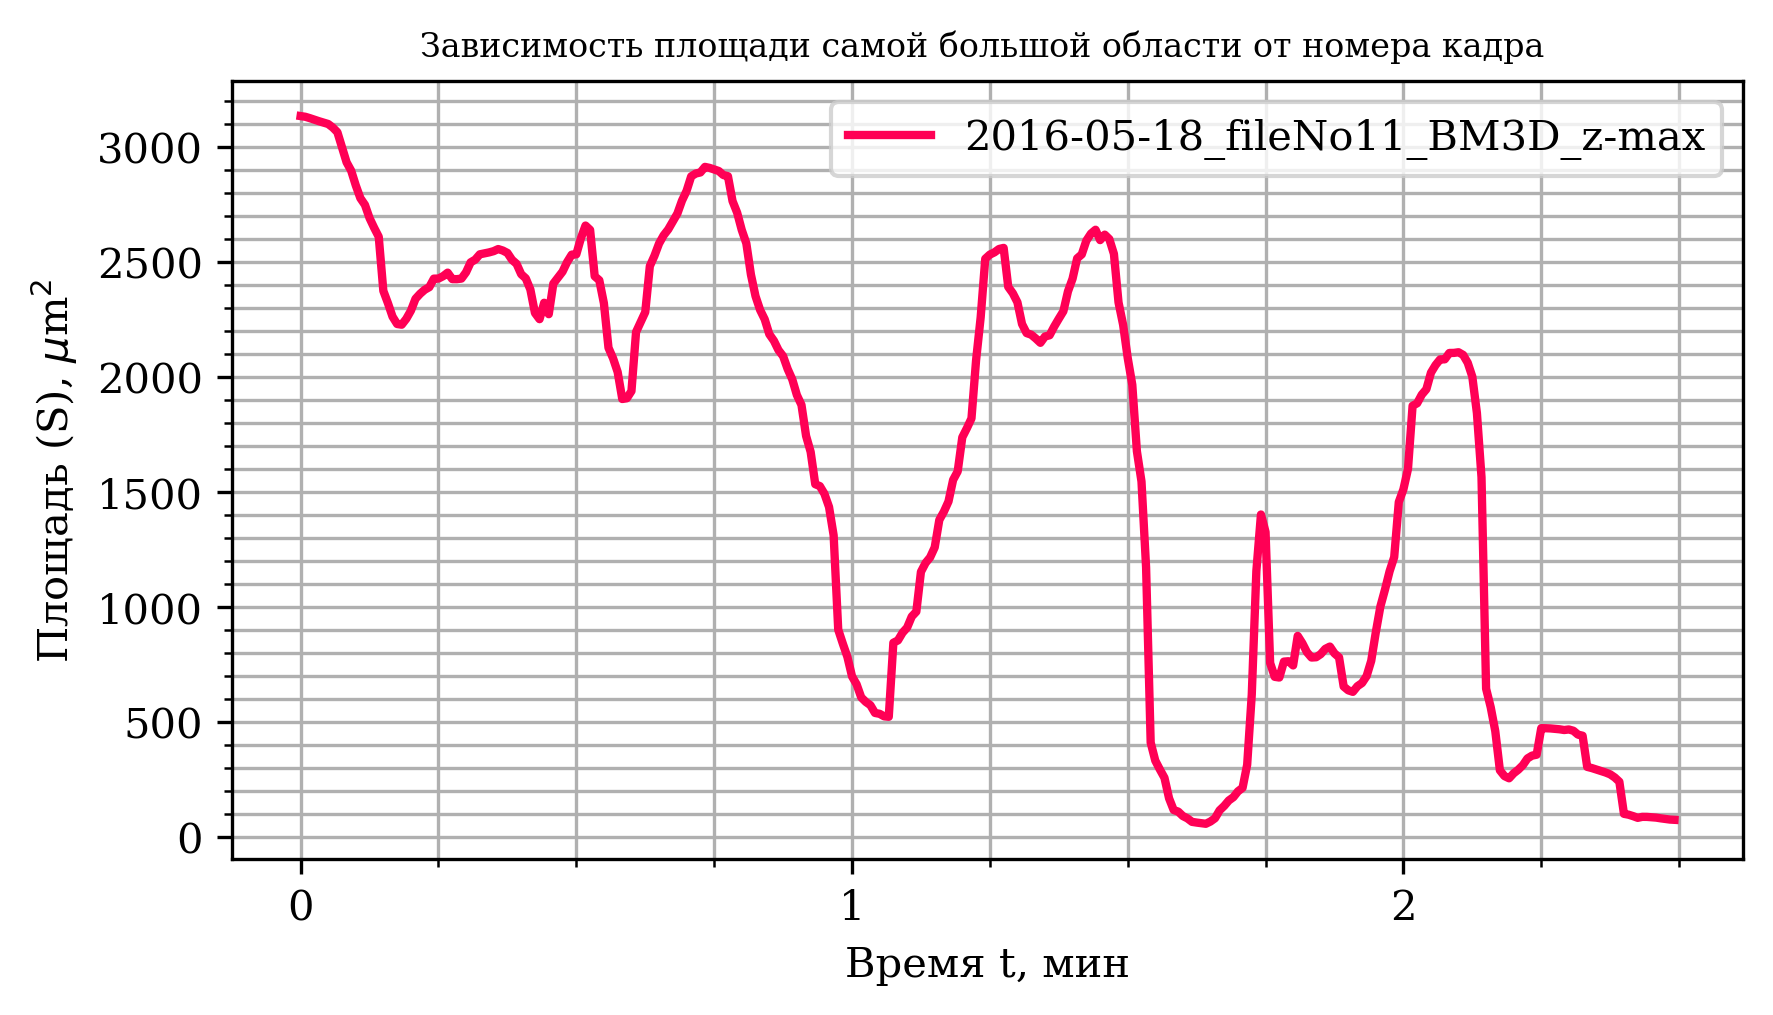

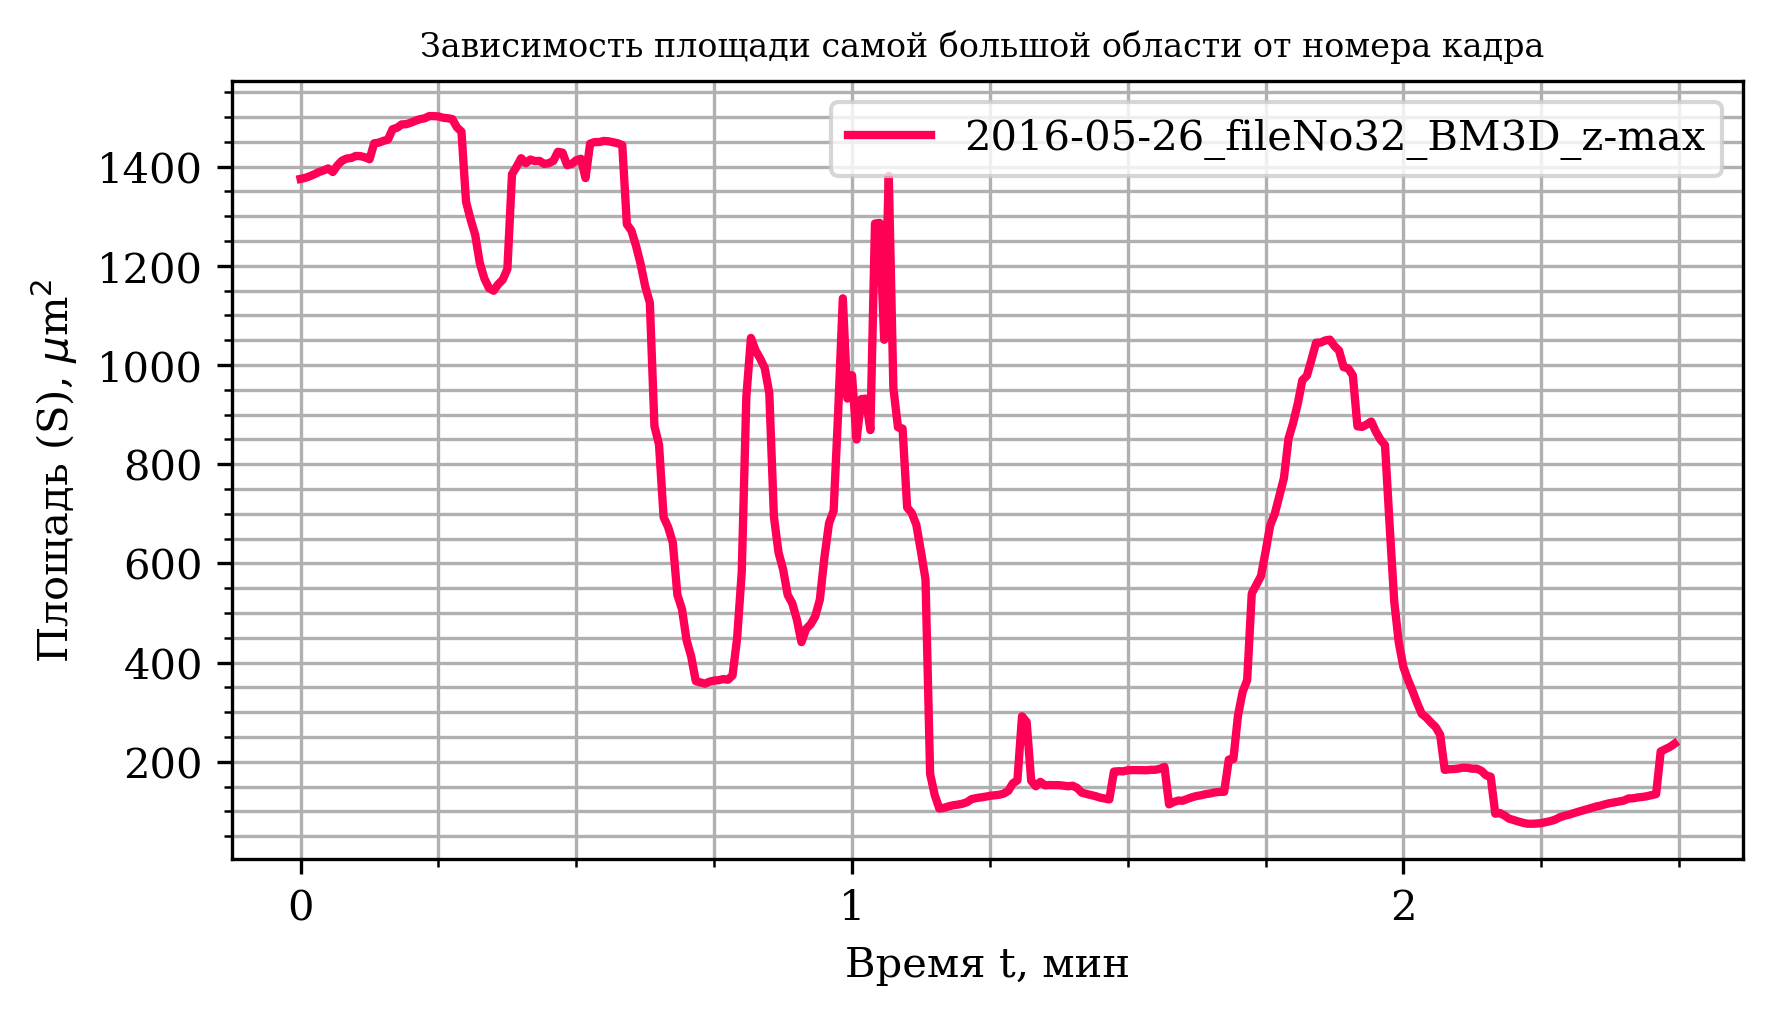

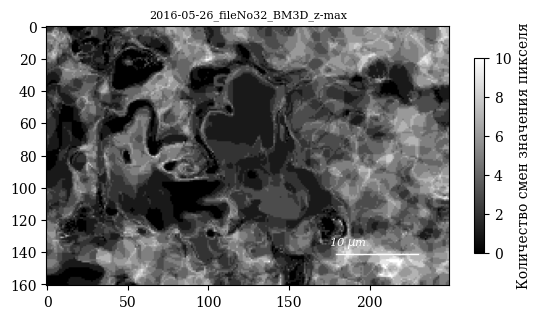

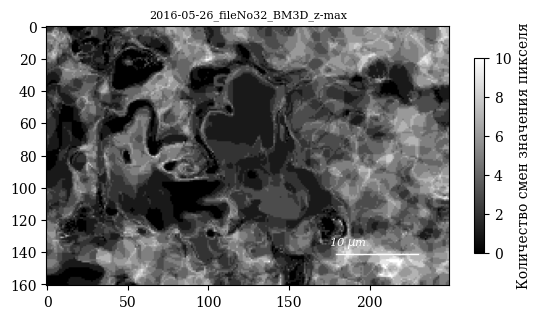

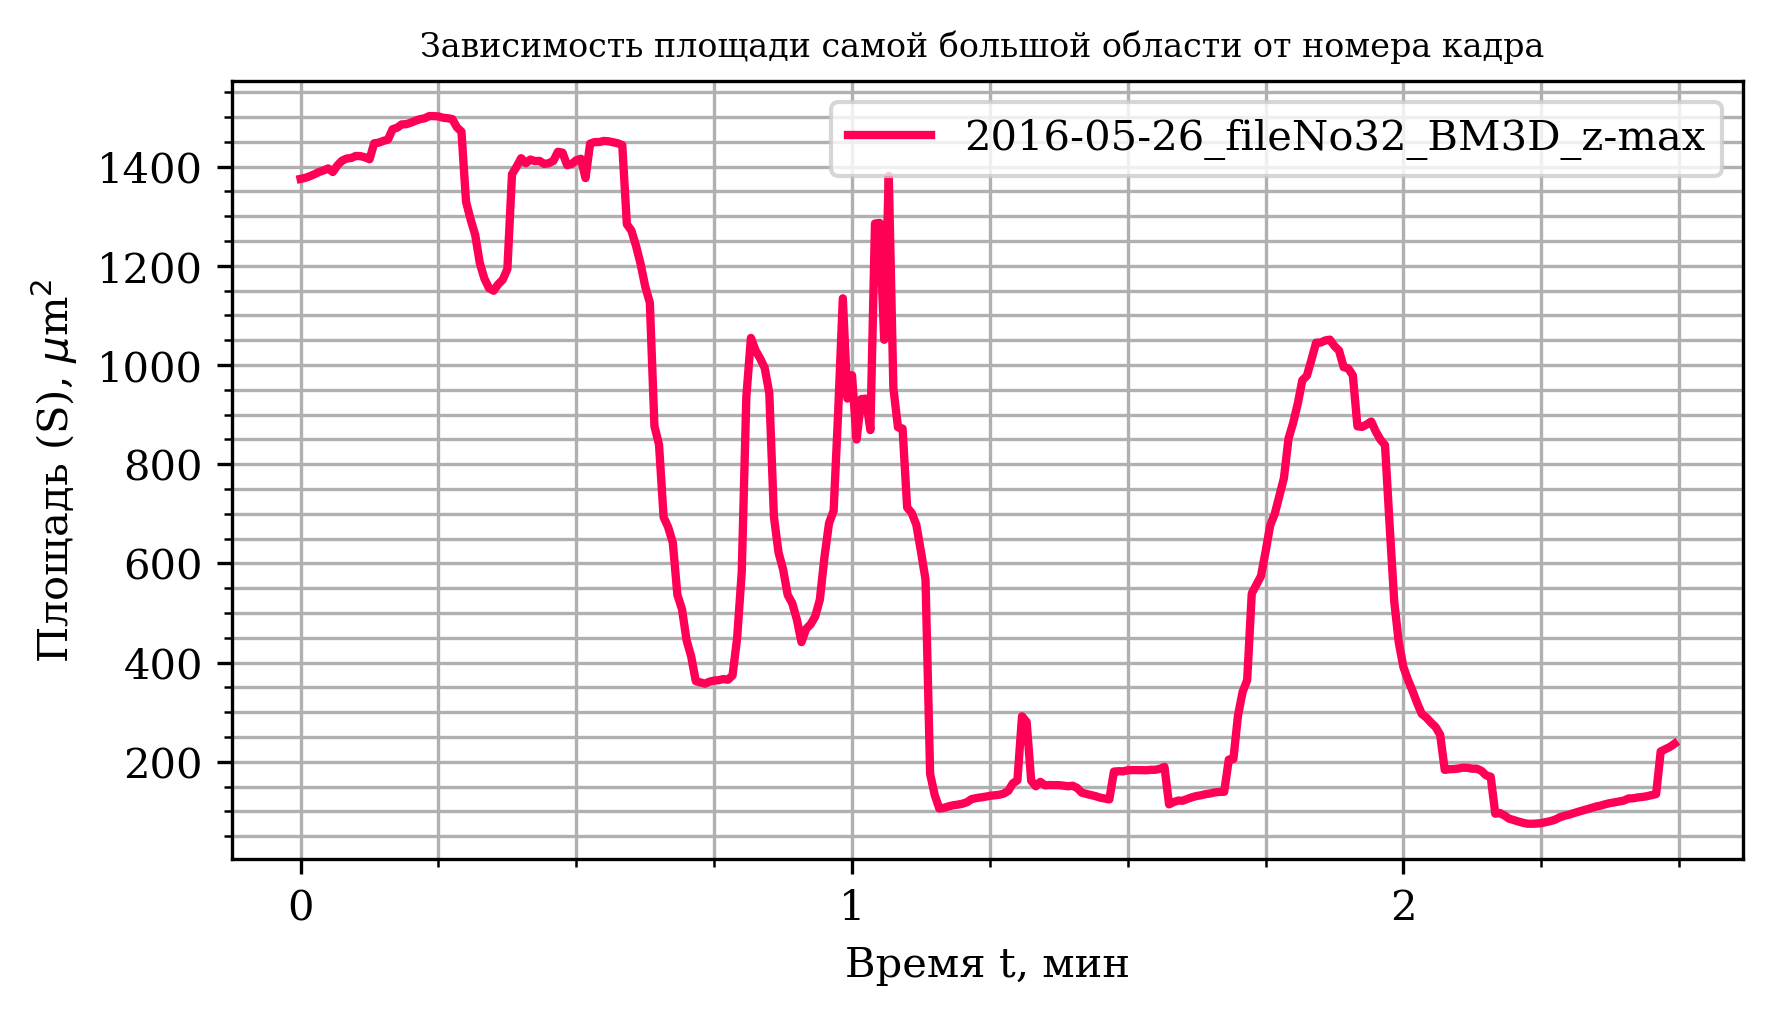

In [81]:
def function_to_func8(df_ev):
    result = type_videorecords(df_ev)
    for i in range(len(result)):
        pathes_of_images_list = result[i]['file_path'].values
        func8(pathes_of_images_list)
function_to_func8(df_ev = df_all[df_all.file_path.str.contains('event')])
    

In [1]:
import astro_pack

In [2]:
from astro_pack import all_IMAGES, xy_dataFrame, countforhist, D2_hist

In [3]:
df_all = all_IMAGES.read_data(data_dir =  'C:/nn/Task_Astrocytes/Task_Astrocytes')

In [4]:
pathes_of_images_list = xy_dataFrame.part_of_df_all(df_all, v_record='tser1')

In [5]:
Mo = countforhist.count_hist(pathes_of_images_list)[0]
title = countforhist.count_hist(pathes_of_images_list)[1]

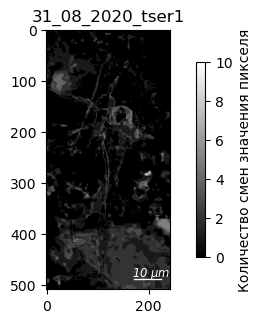

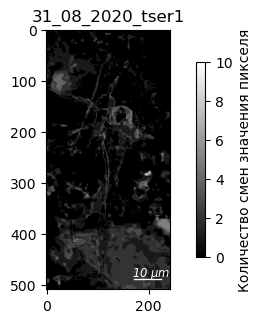

In [6]:
D2_hist.D2_histogfamm(Mo, title)

In [7]:
from astro_pack import square_number_of_shot
from astro_pack import plot_of_means_of_S, save_histogramm, save_plot, tablesave, file_for_func8, file_for_func_to_func8, file_with_6dfs


In [8]:
maximum_S = square_number_of_shot.count_Sq_max(pathes_of_images_list)

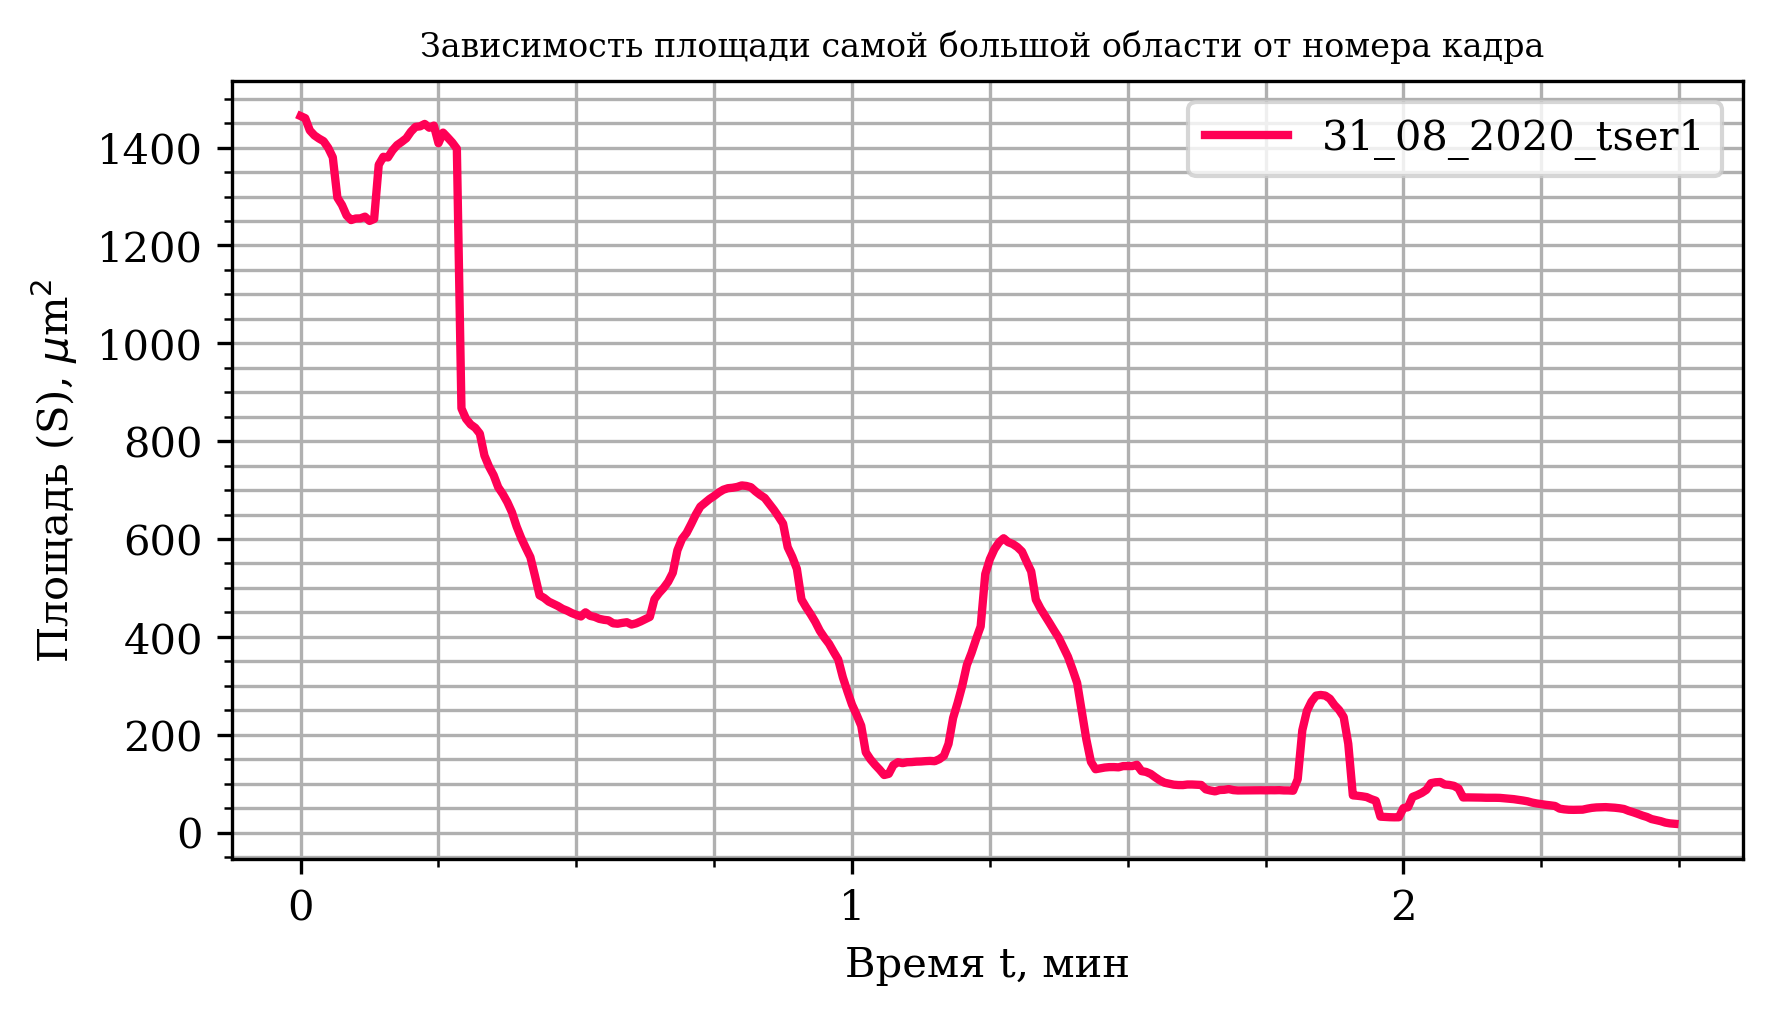

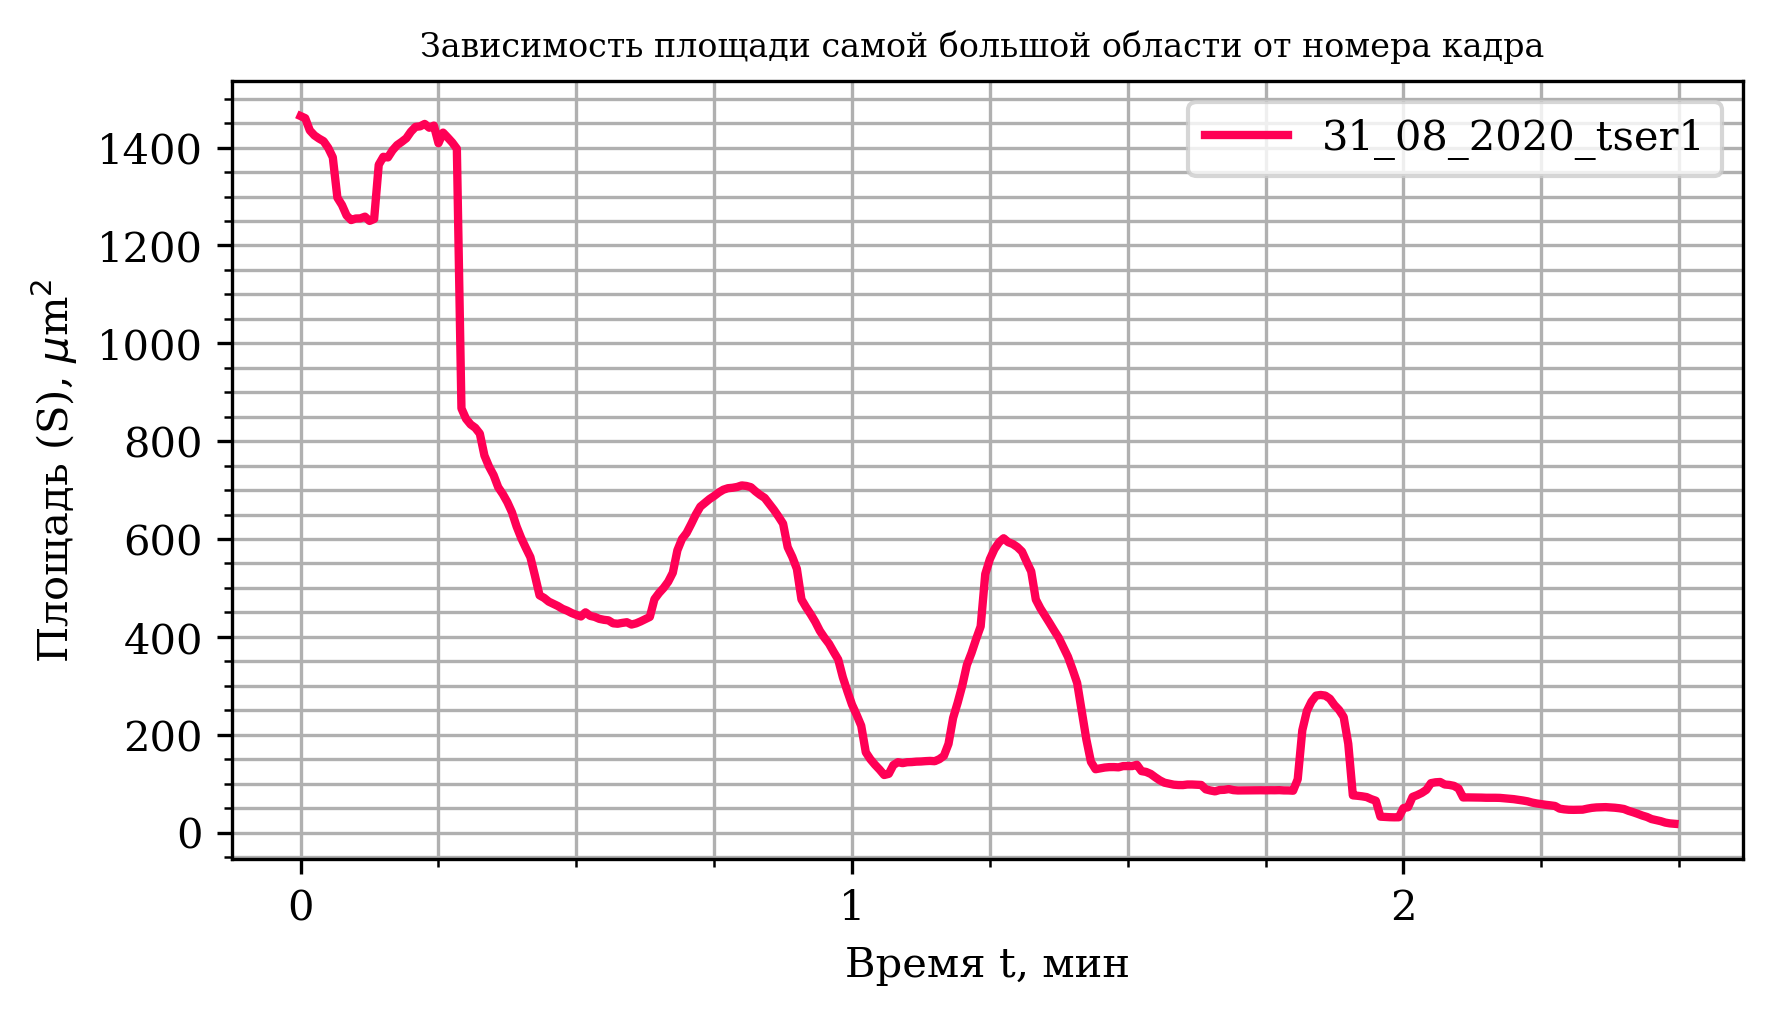

In [9]:
plot_of_means_of_S.plot(maximum_S, title)

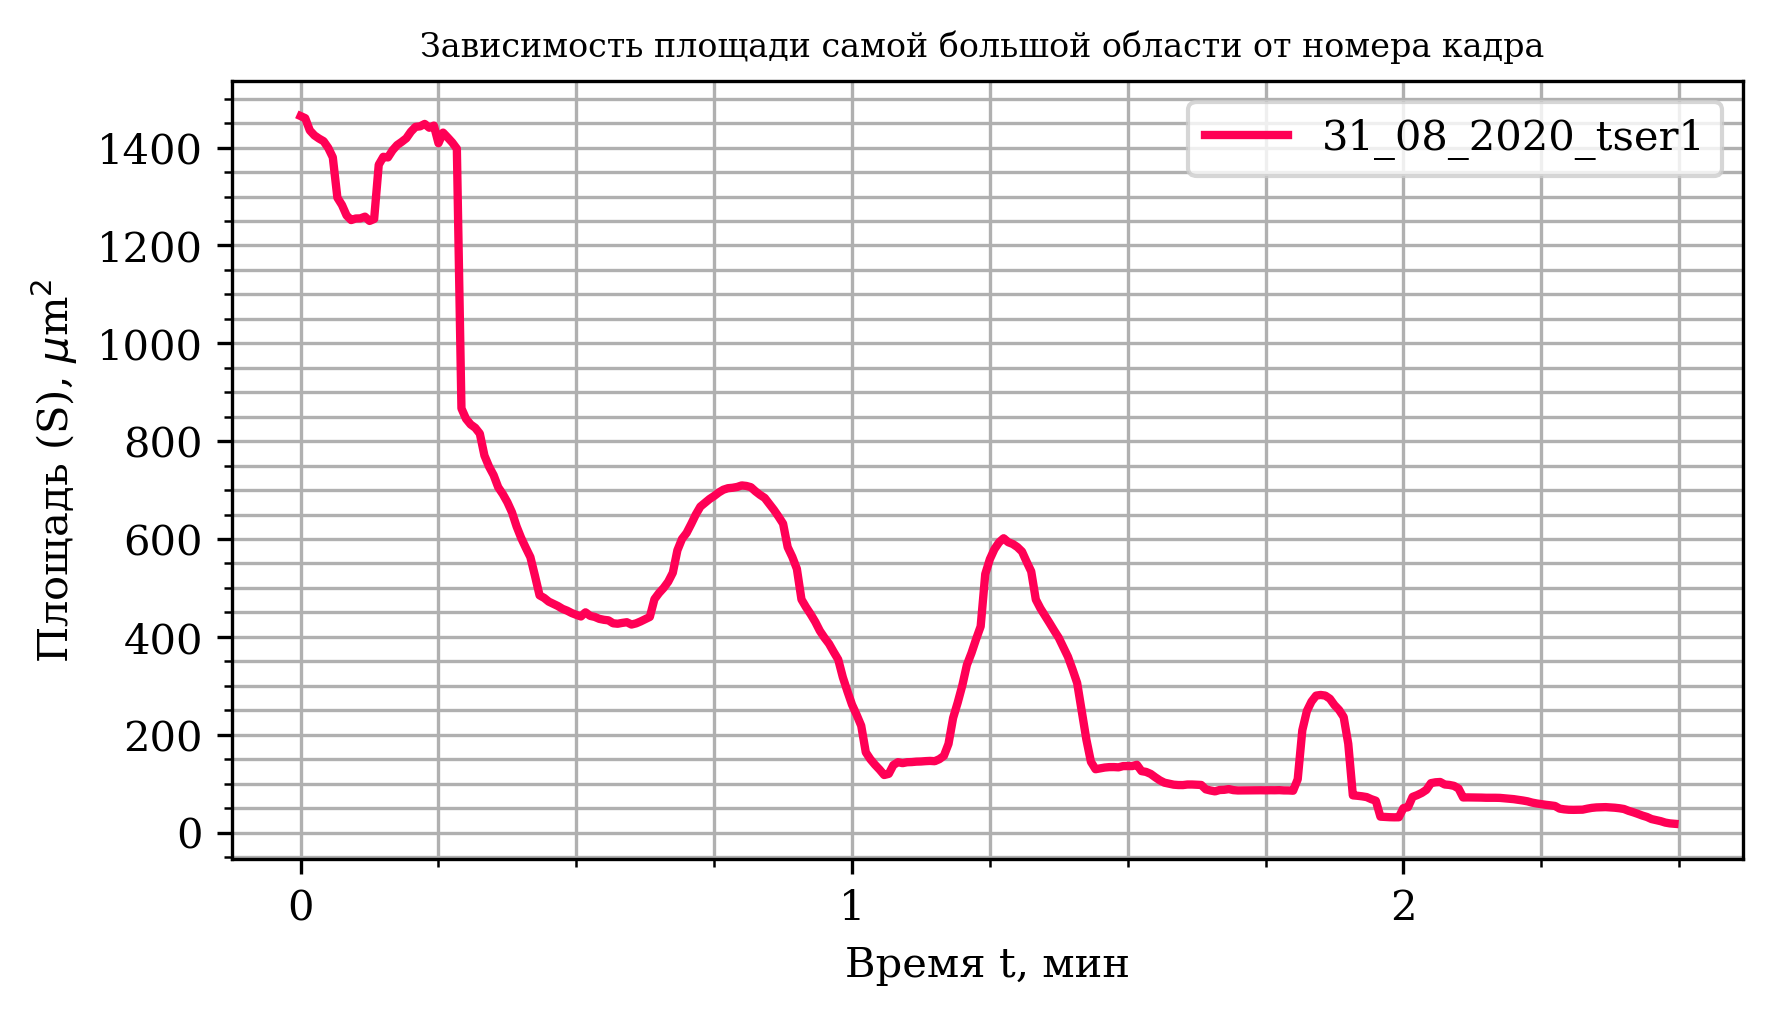

In [10]:
save_plot.save_plt(pathes_of_images_list, data_dir = r'C:/Users/sibir/Desktop/results/plot')

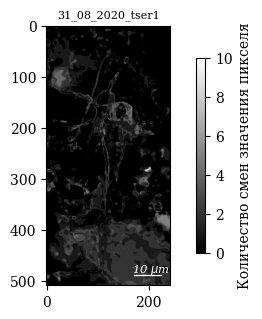

In [11]:
save_histogramm.save_hist(pathes_of_images_list, data_dir = r'C:/Users/sibir/Desktop/results/hist')

In [12]:
tablesave.onerecord_table(maximum_S, pathes_of_images_list, data_dir = r'C:/Users/sibir/Desktop/results/table')

In [13]:
file_with_6dfs.type_videorecords(df_ev=df_all[df_all.file_path.str.contains('event')])

(                                              file_path
 0     C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 2     C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 4     C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 6     C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 8     C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 ...                                                 ...
 1184  C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 1186  C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 1188  C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 1190  C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 1192  C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 
 [300 rows x 1 columns],
                                               file_path
 18    C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 20    C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 22    C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 24    C:\nn\Task_Astrocytes\Task_Astrocytes\31_08_20...
 26 

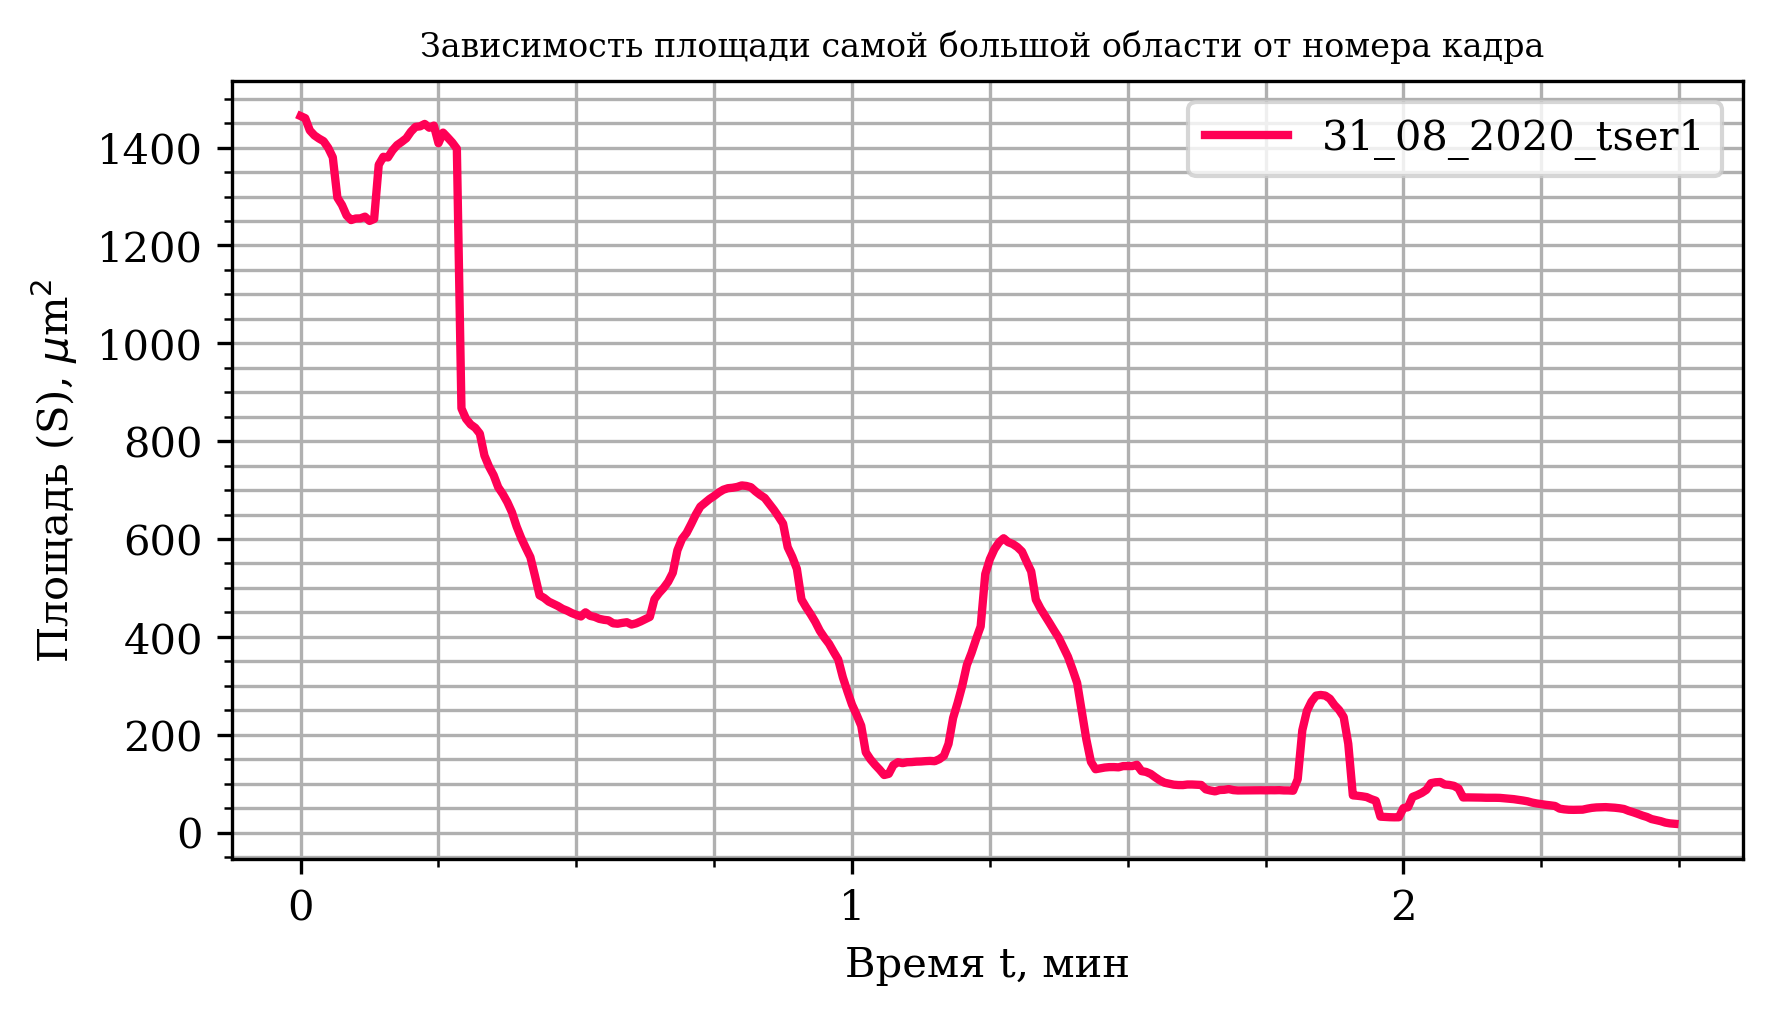

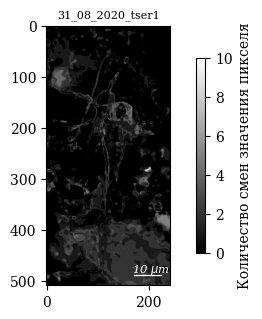

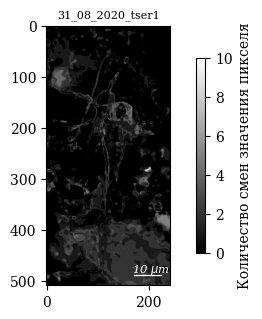

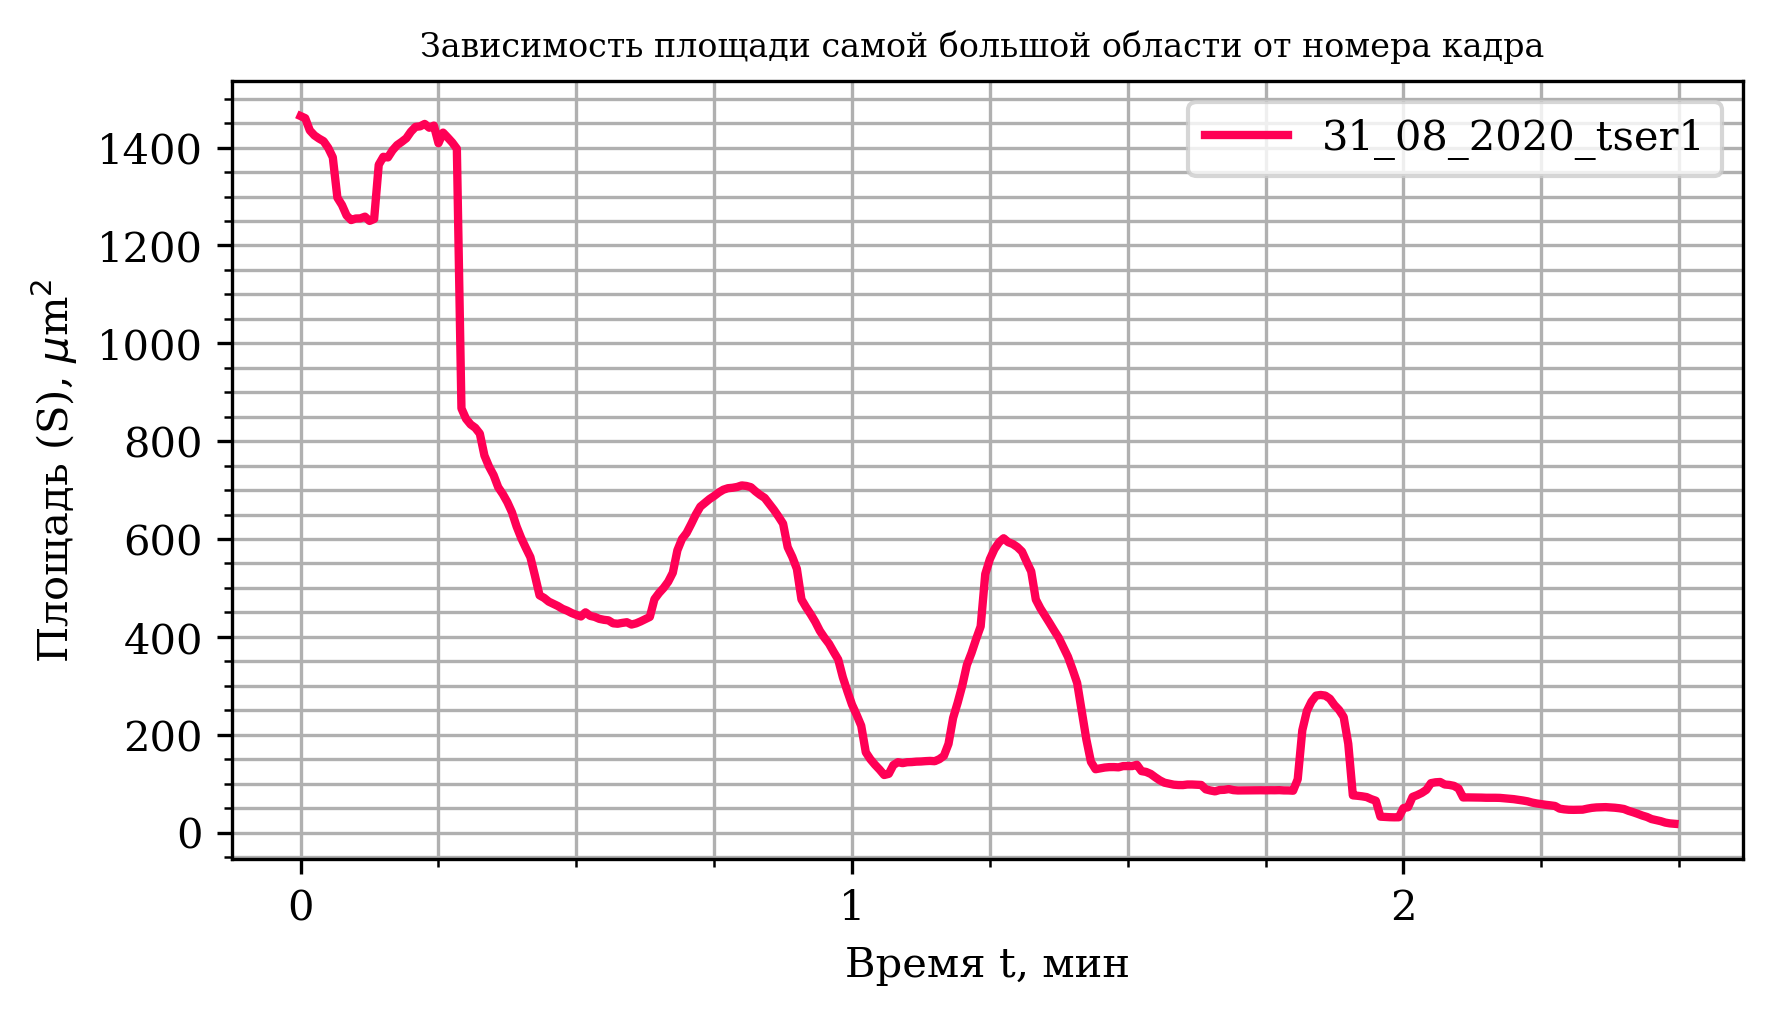

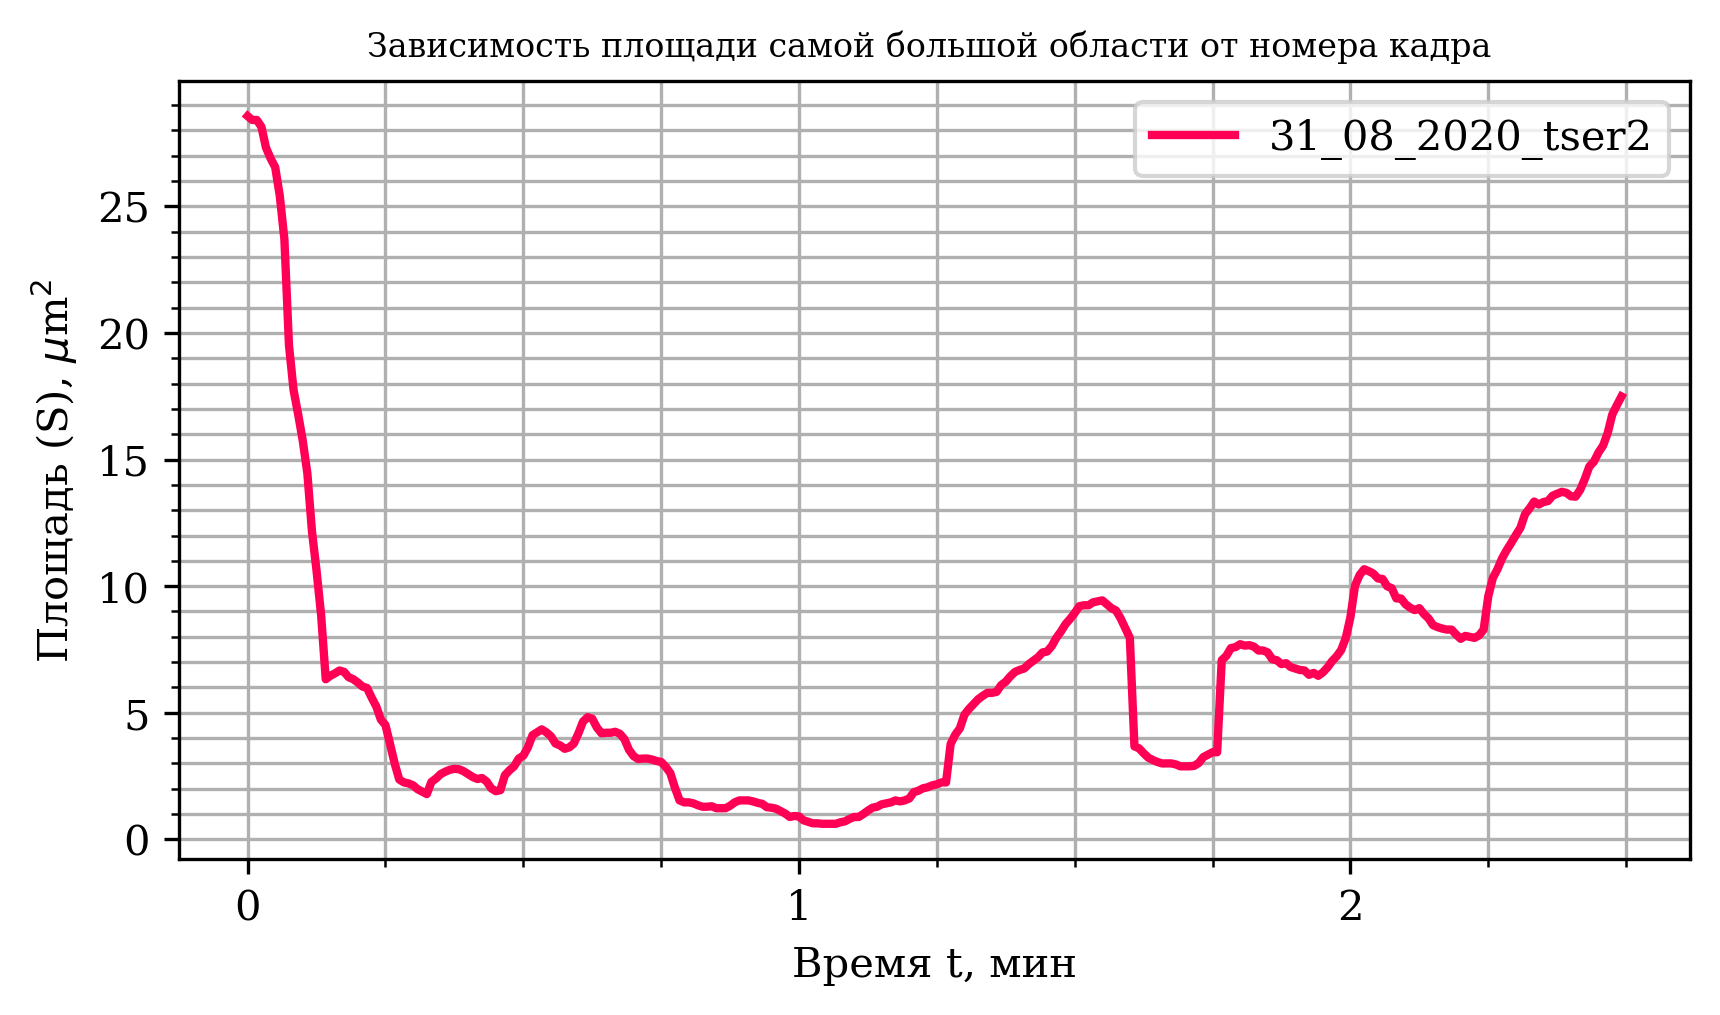

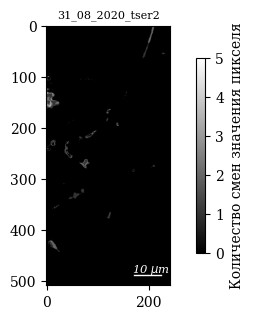

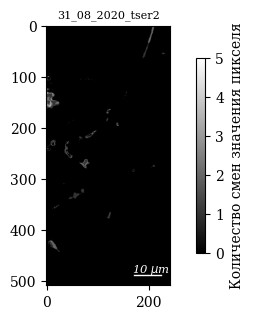

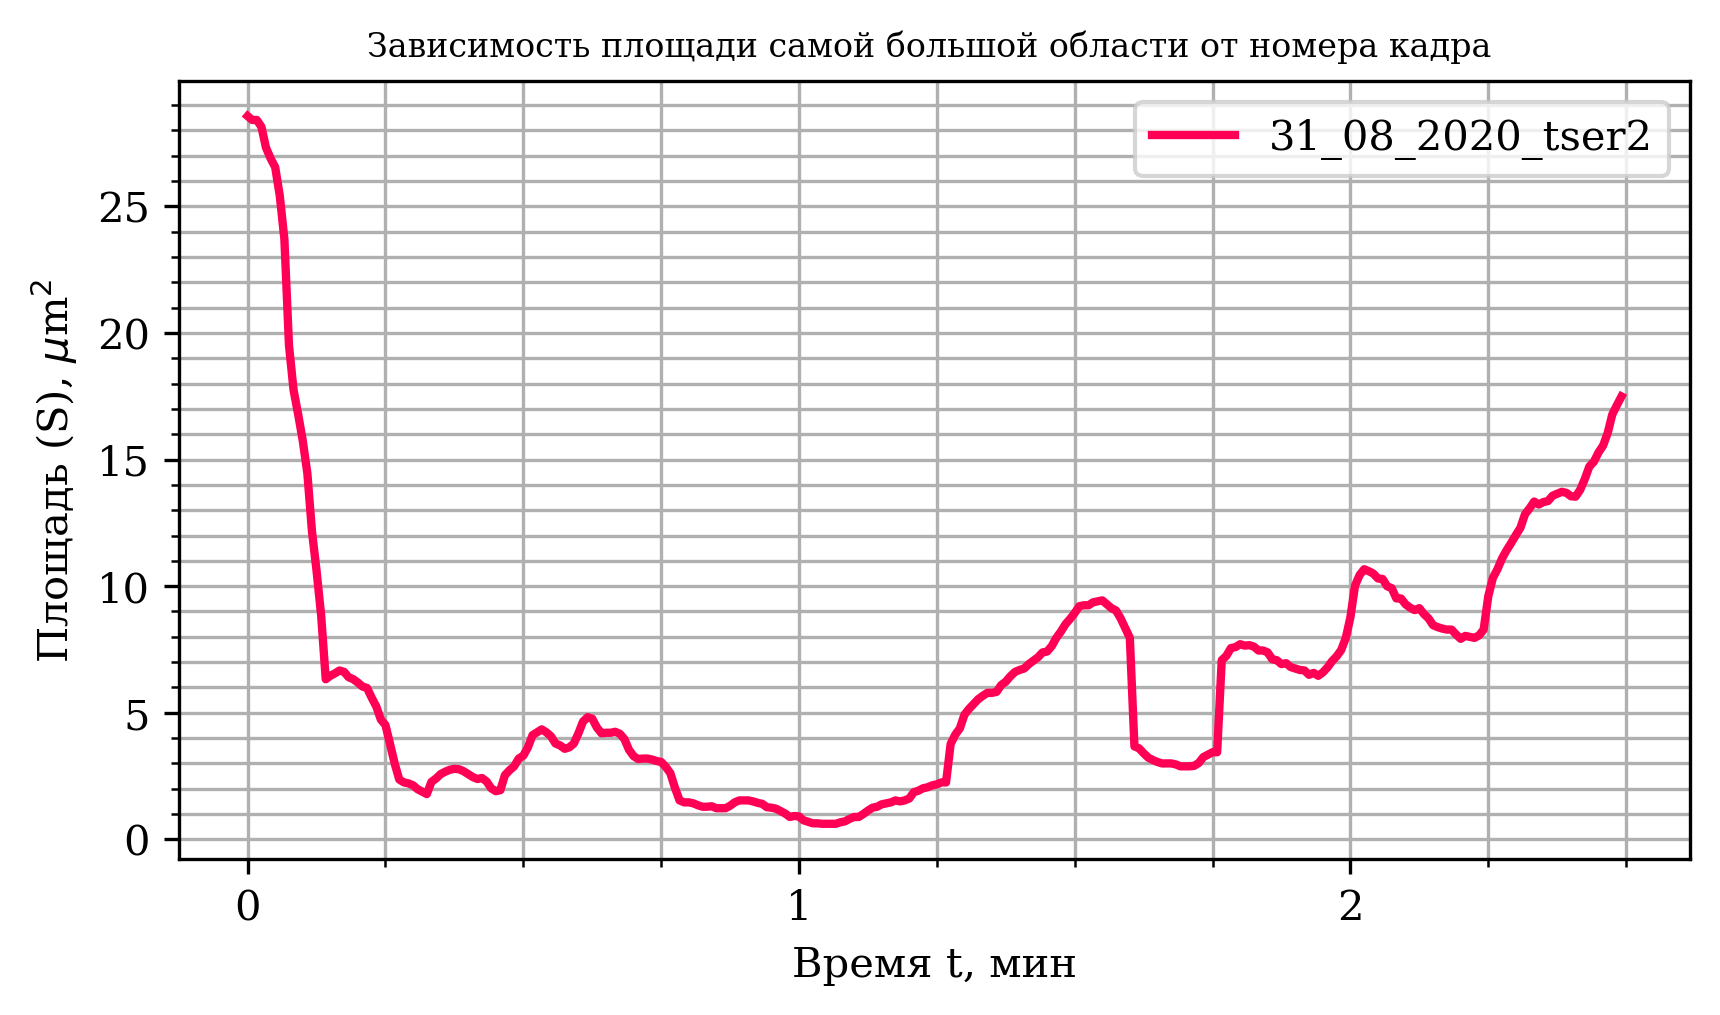

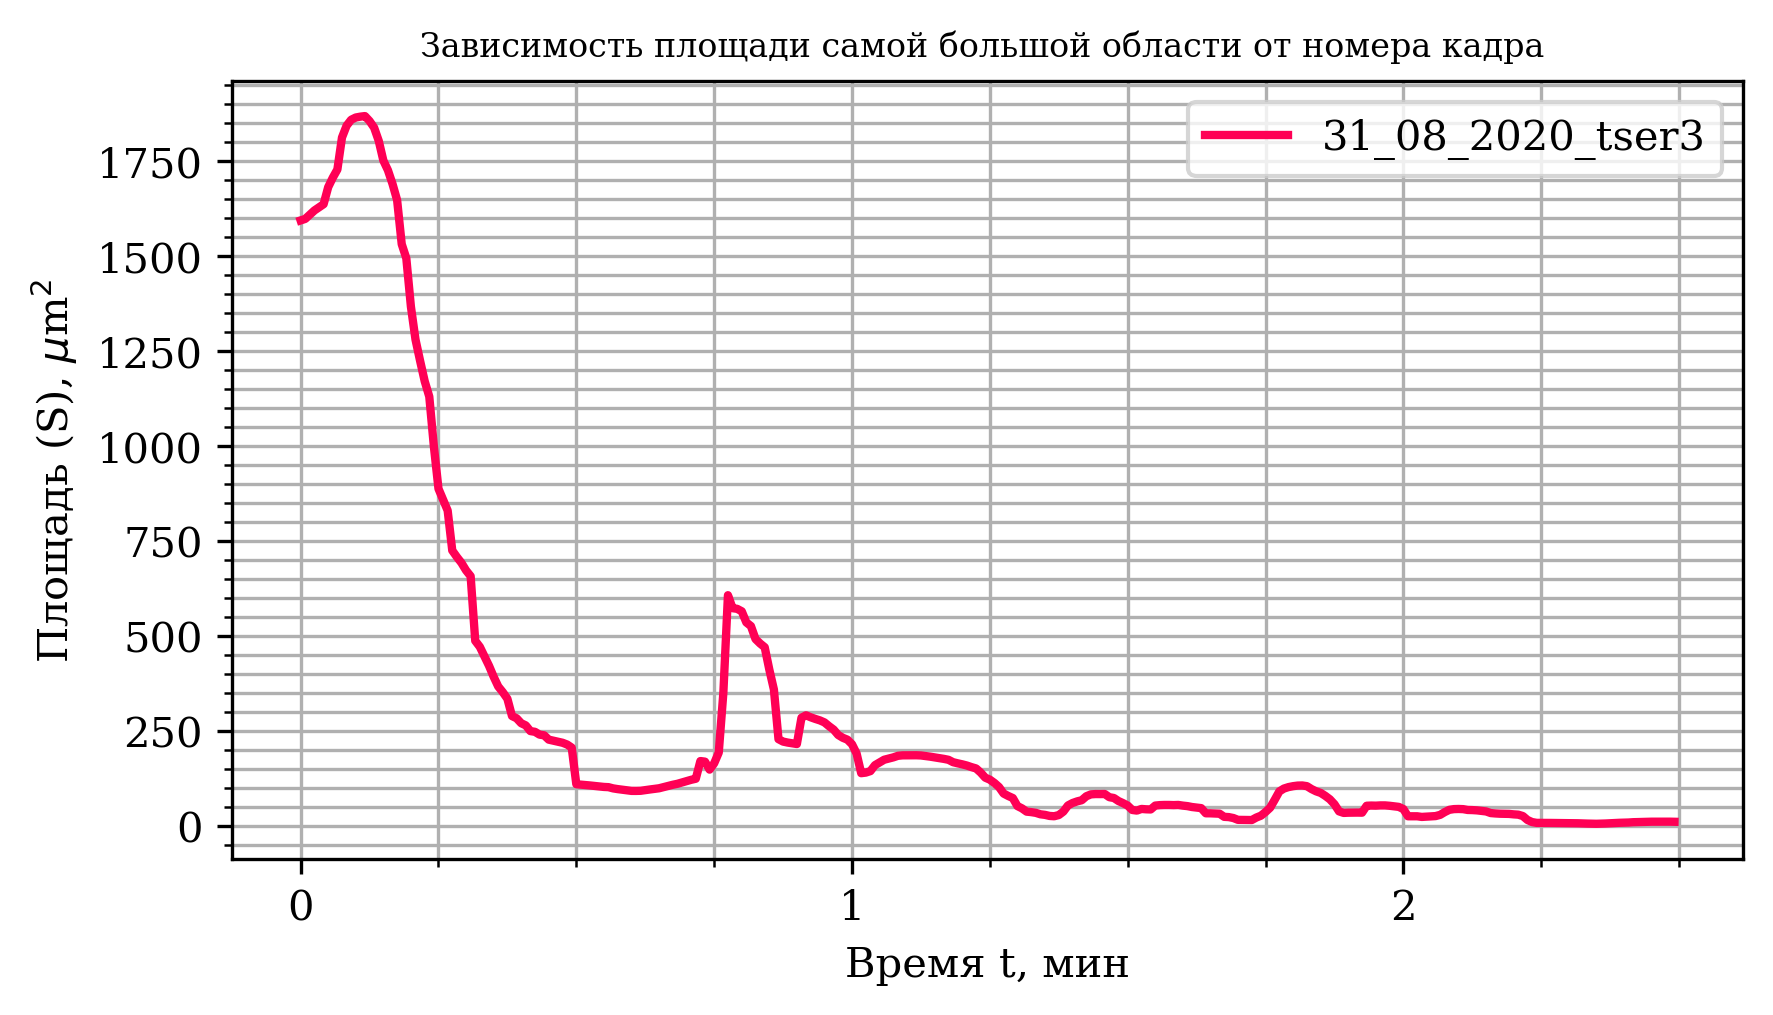

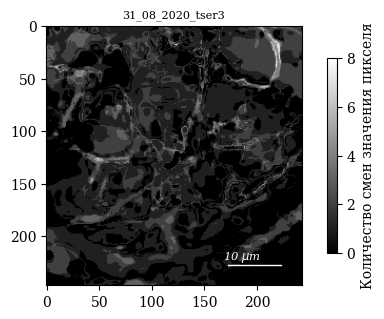

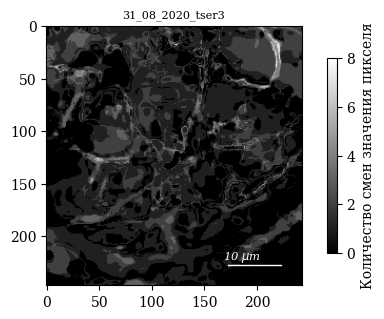

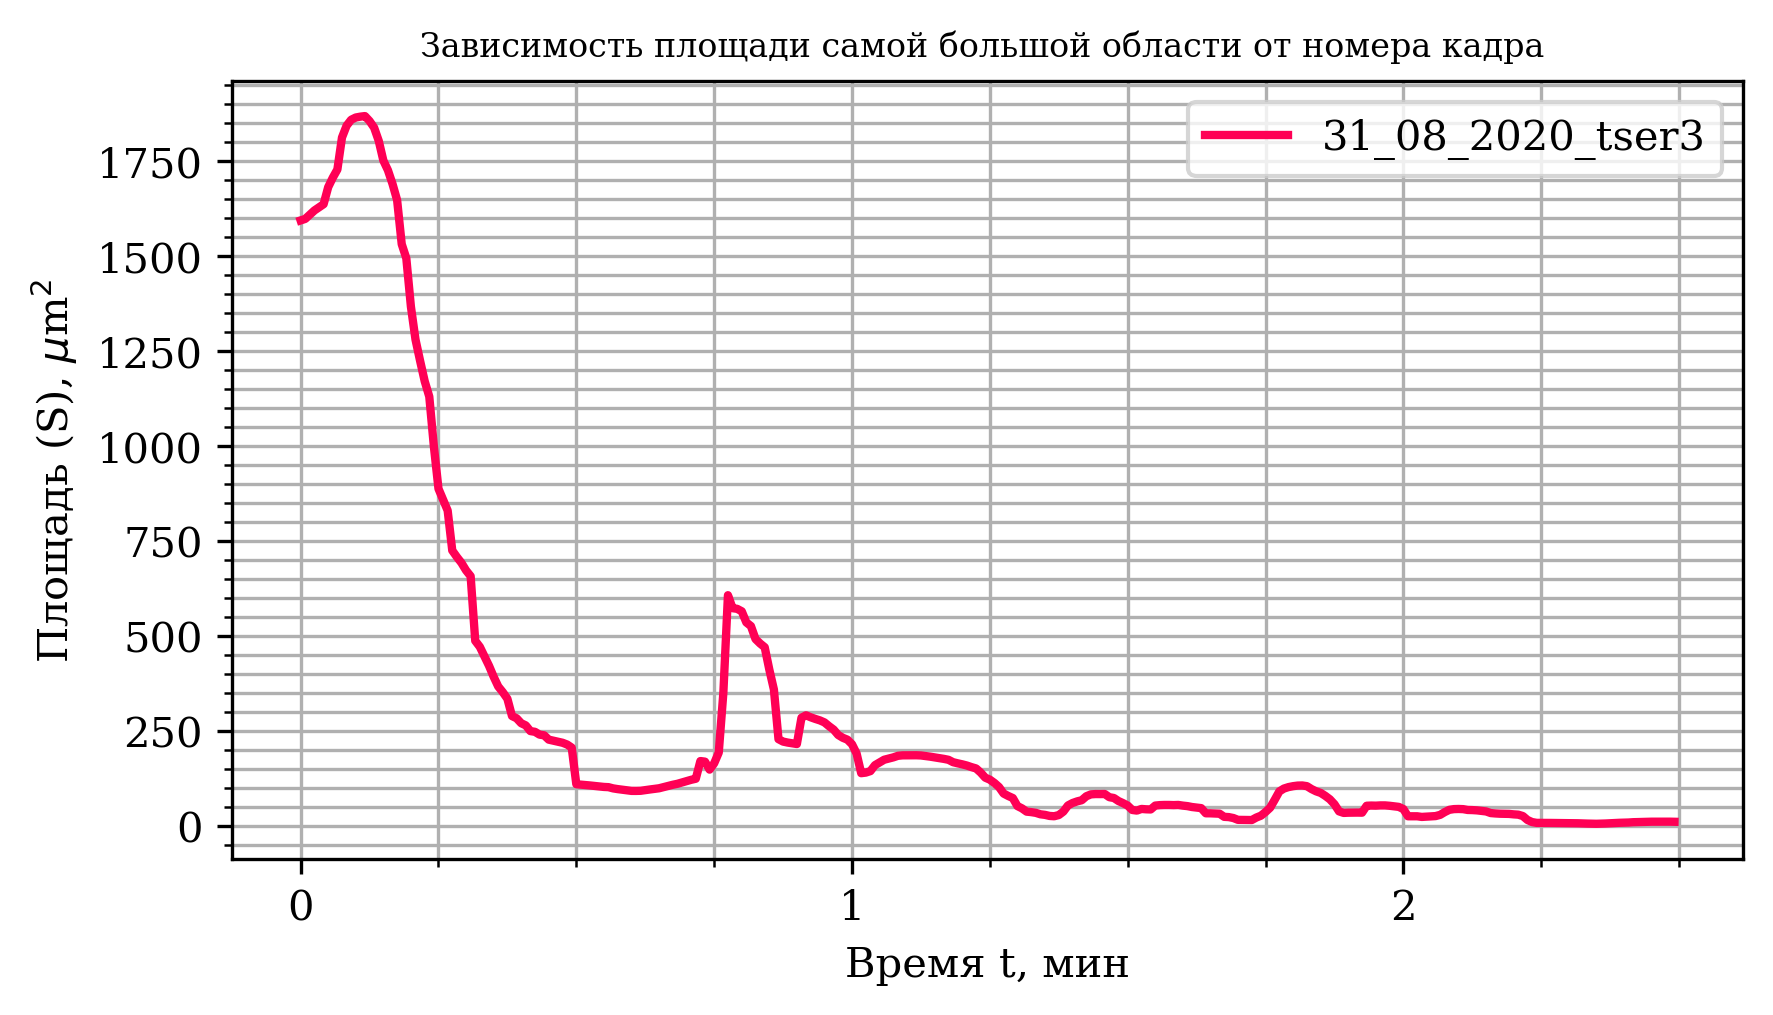

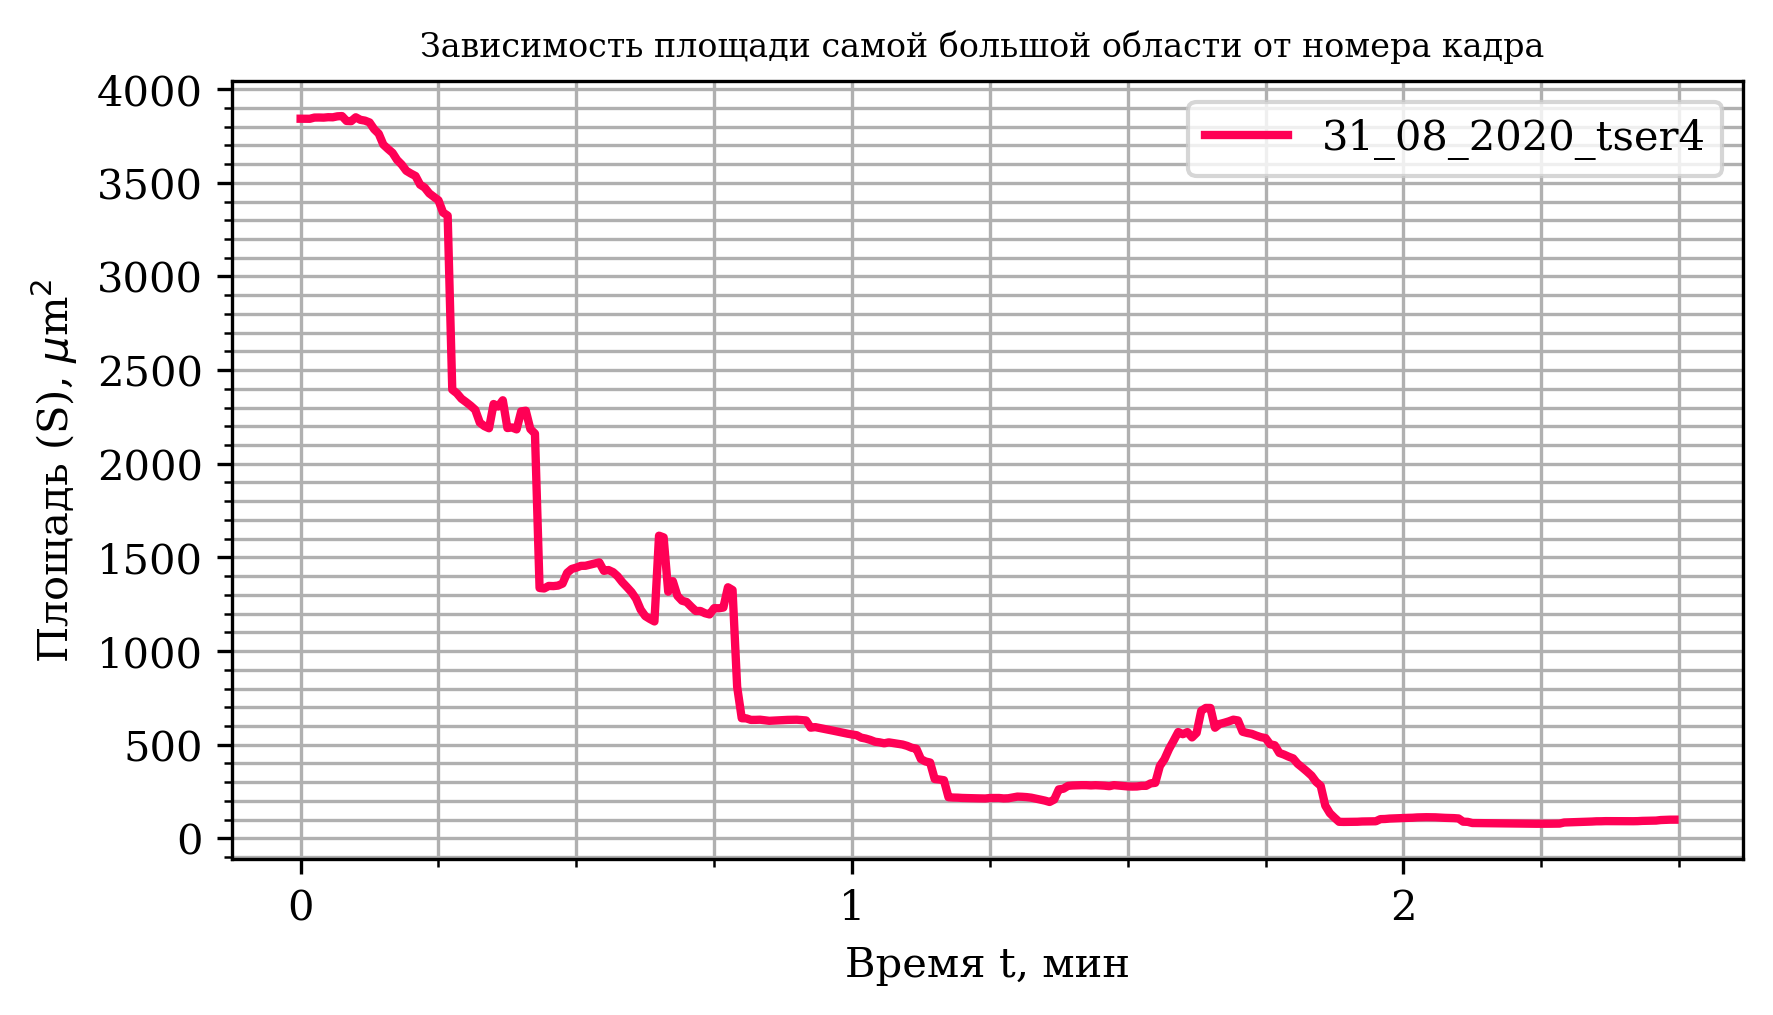

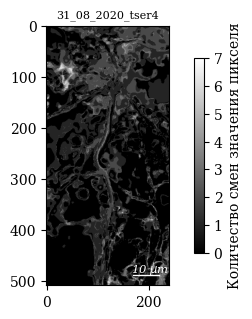

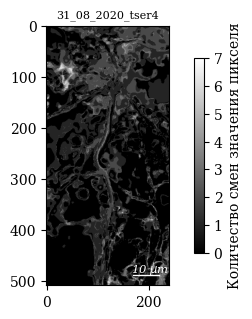

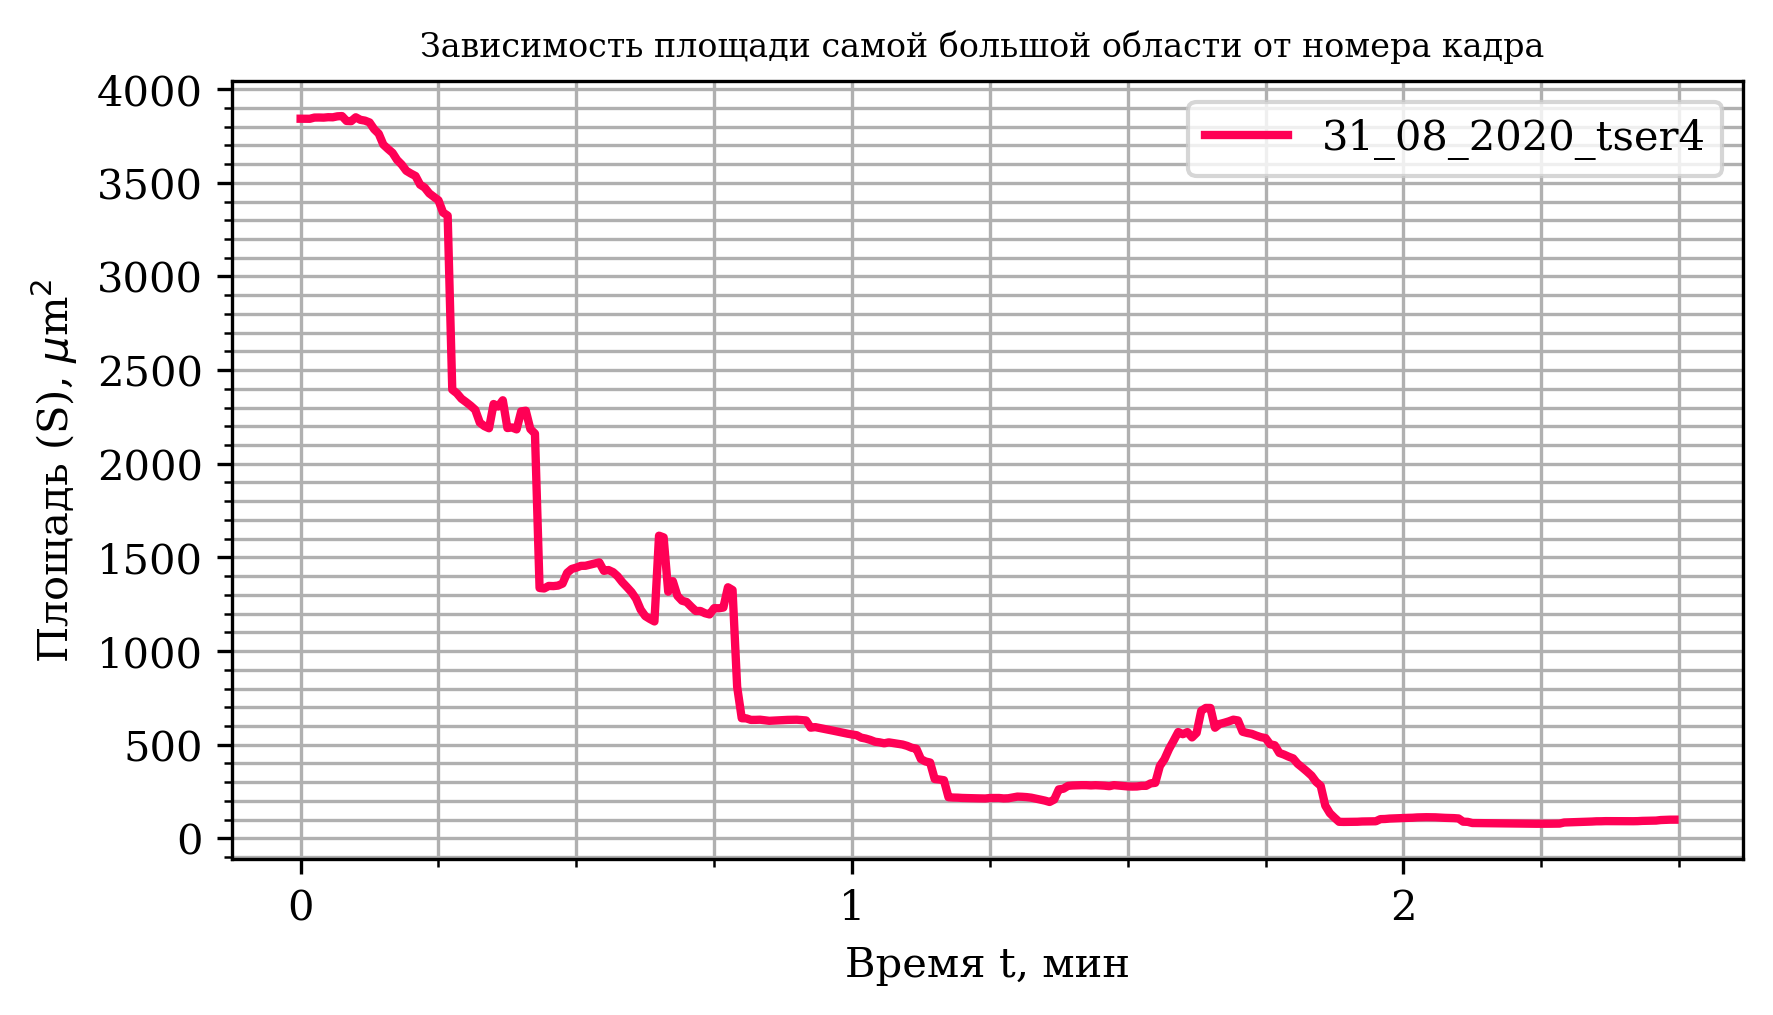

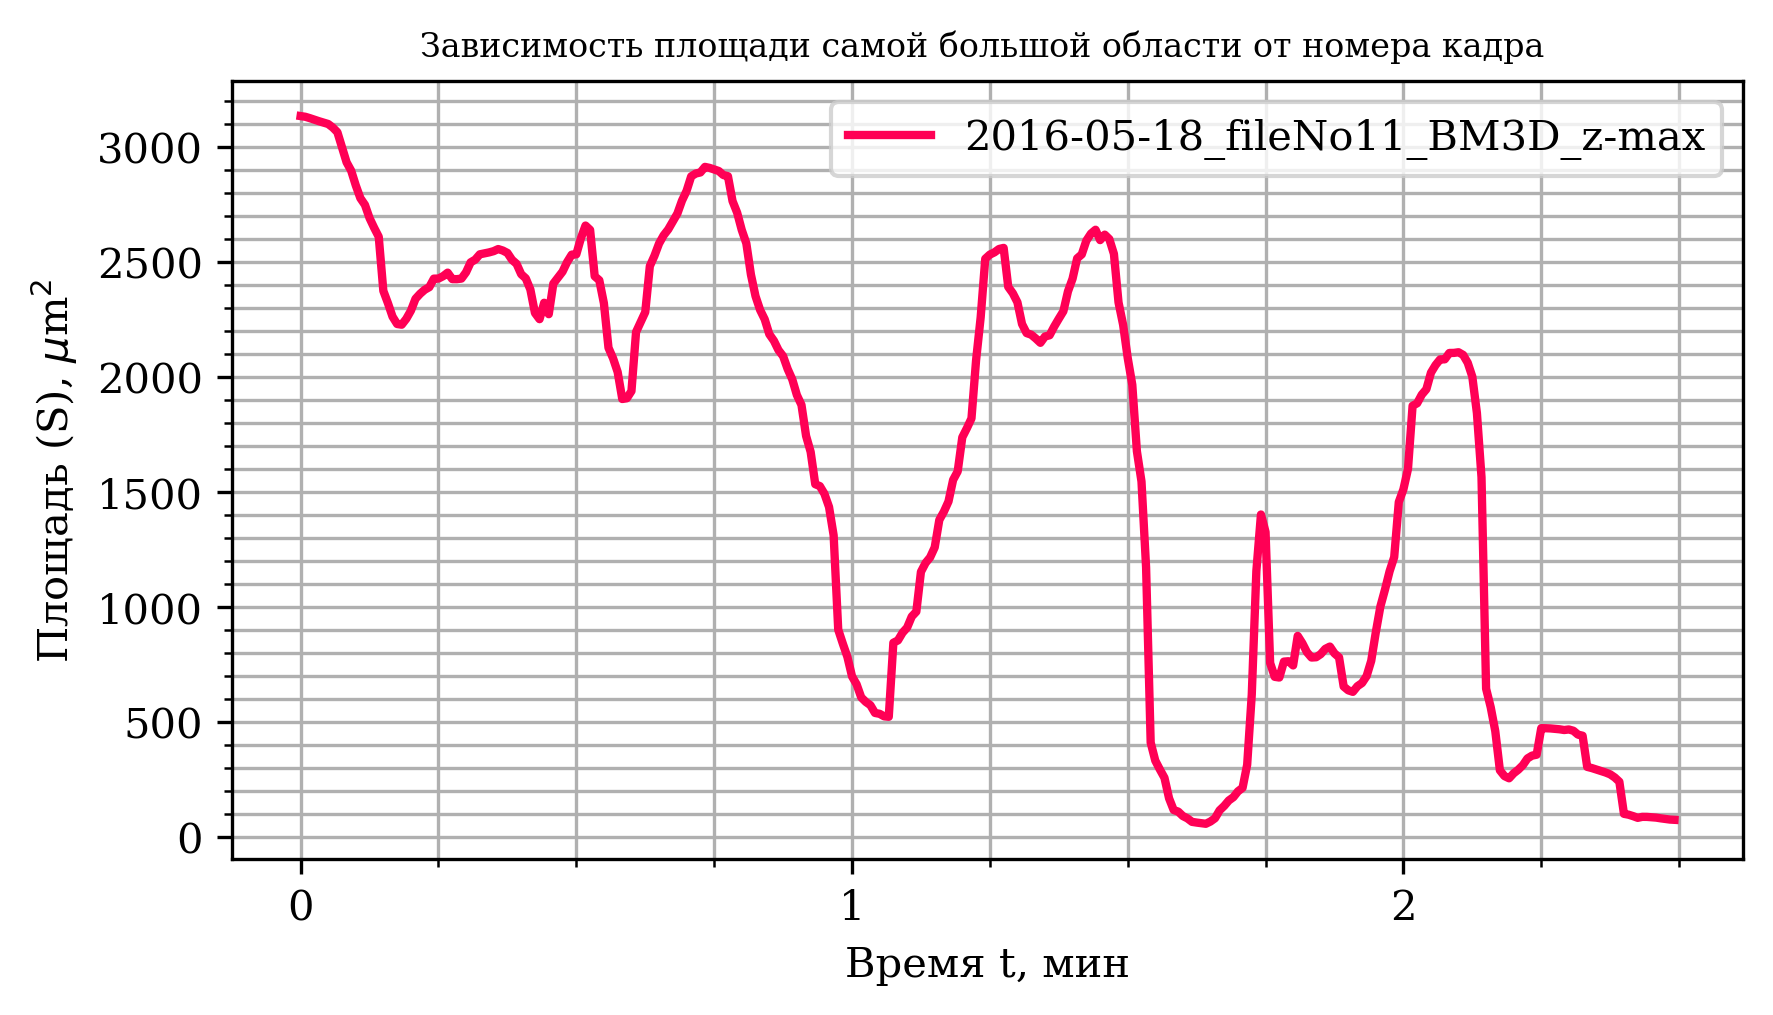

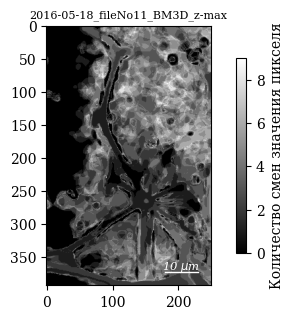

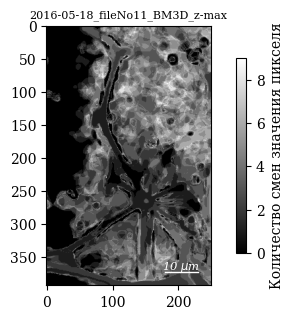

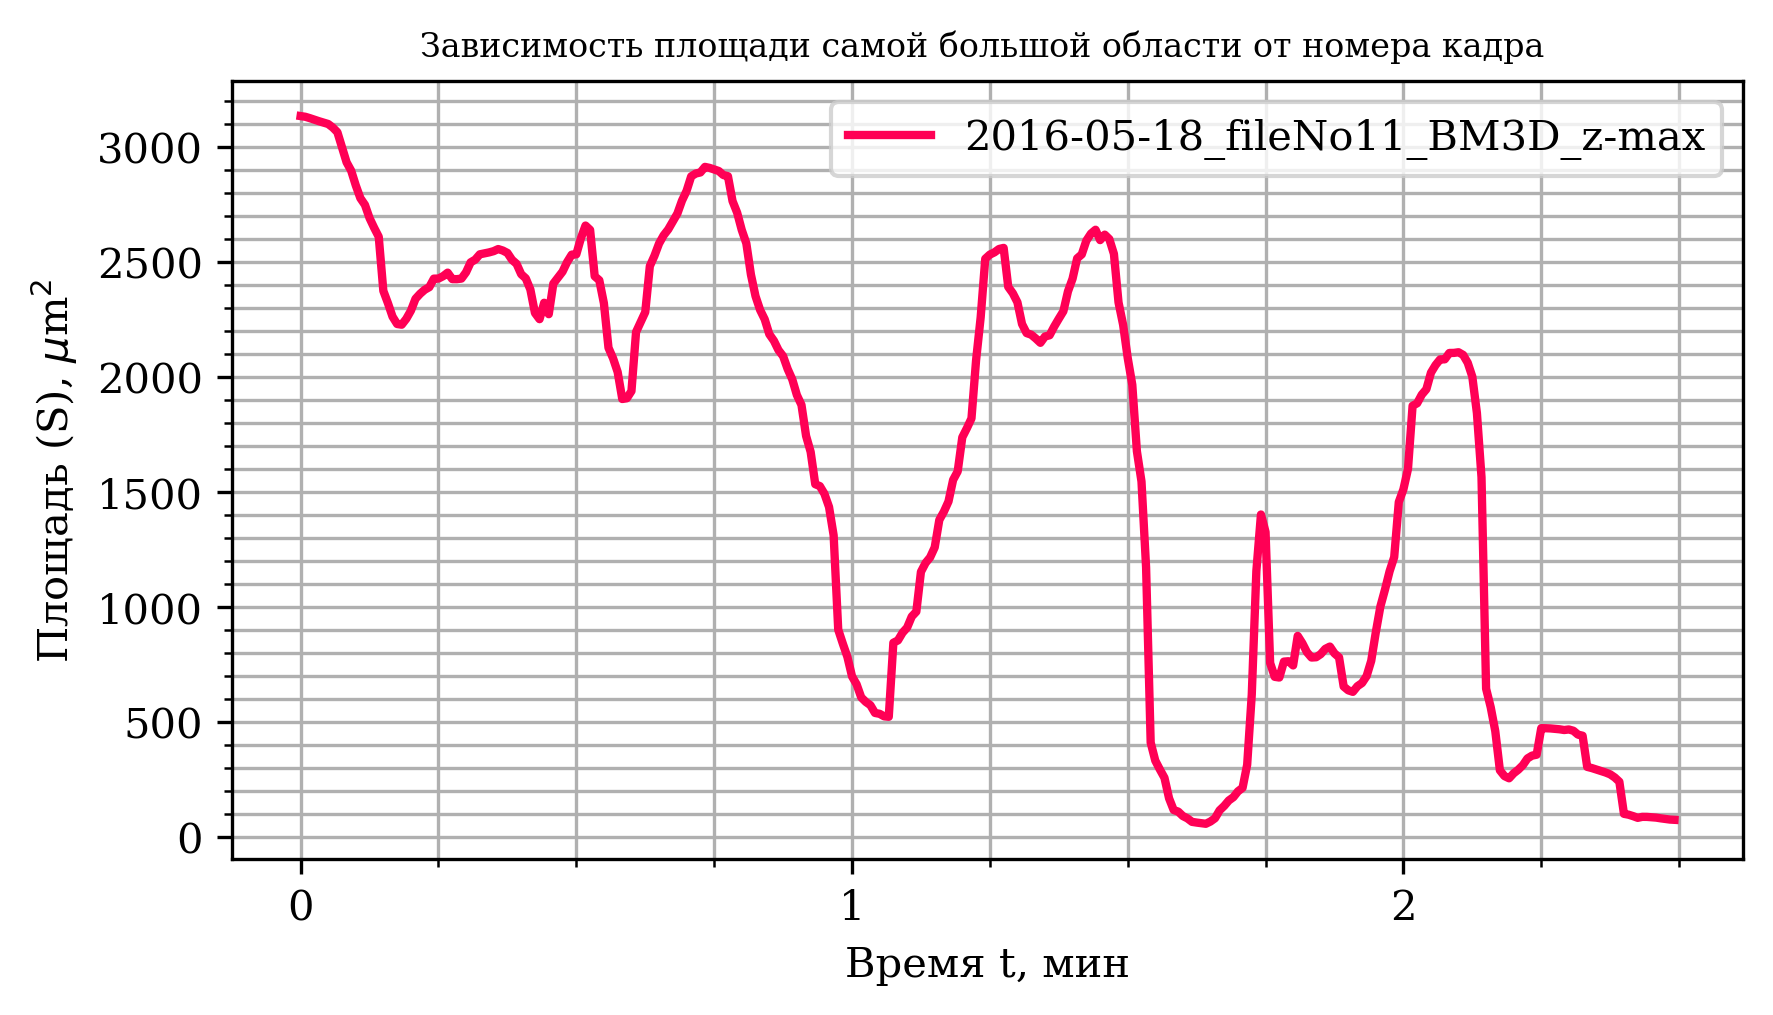

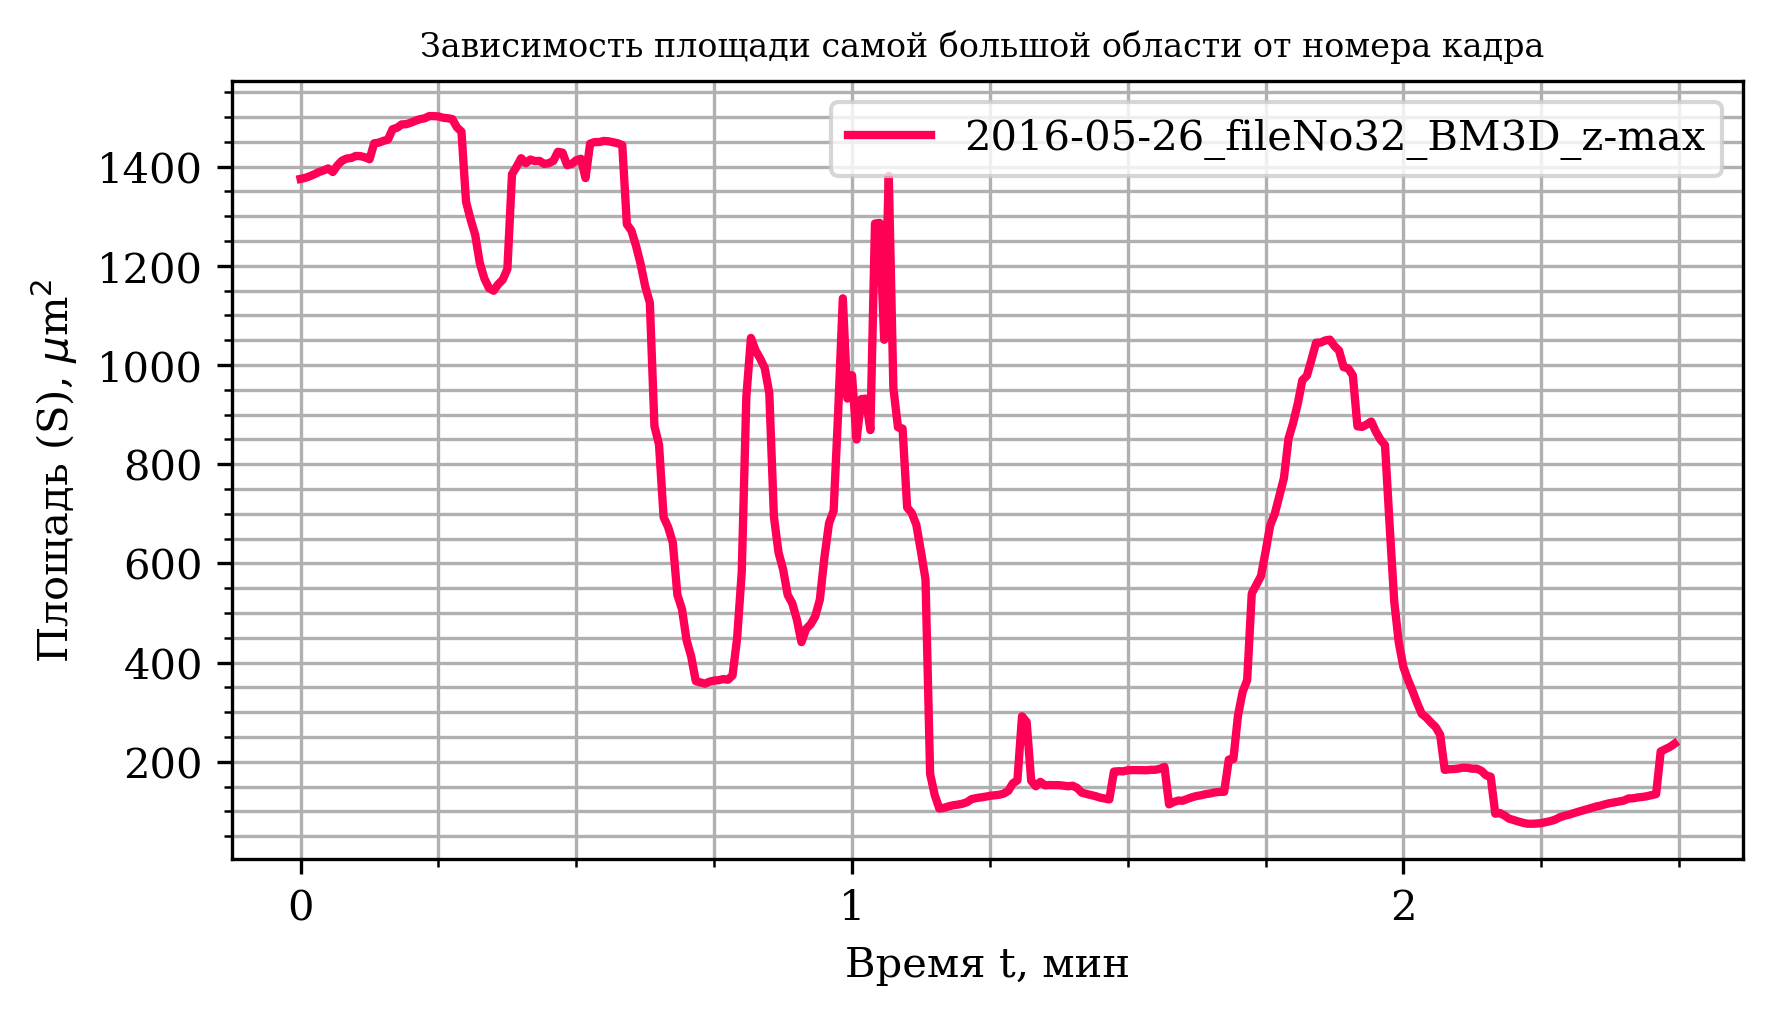

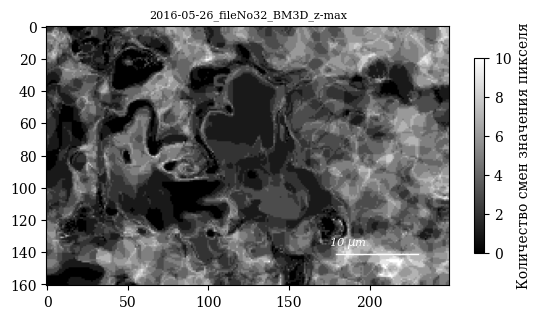

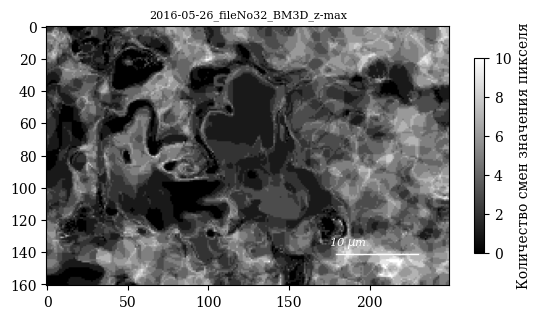

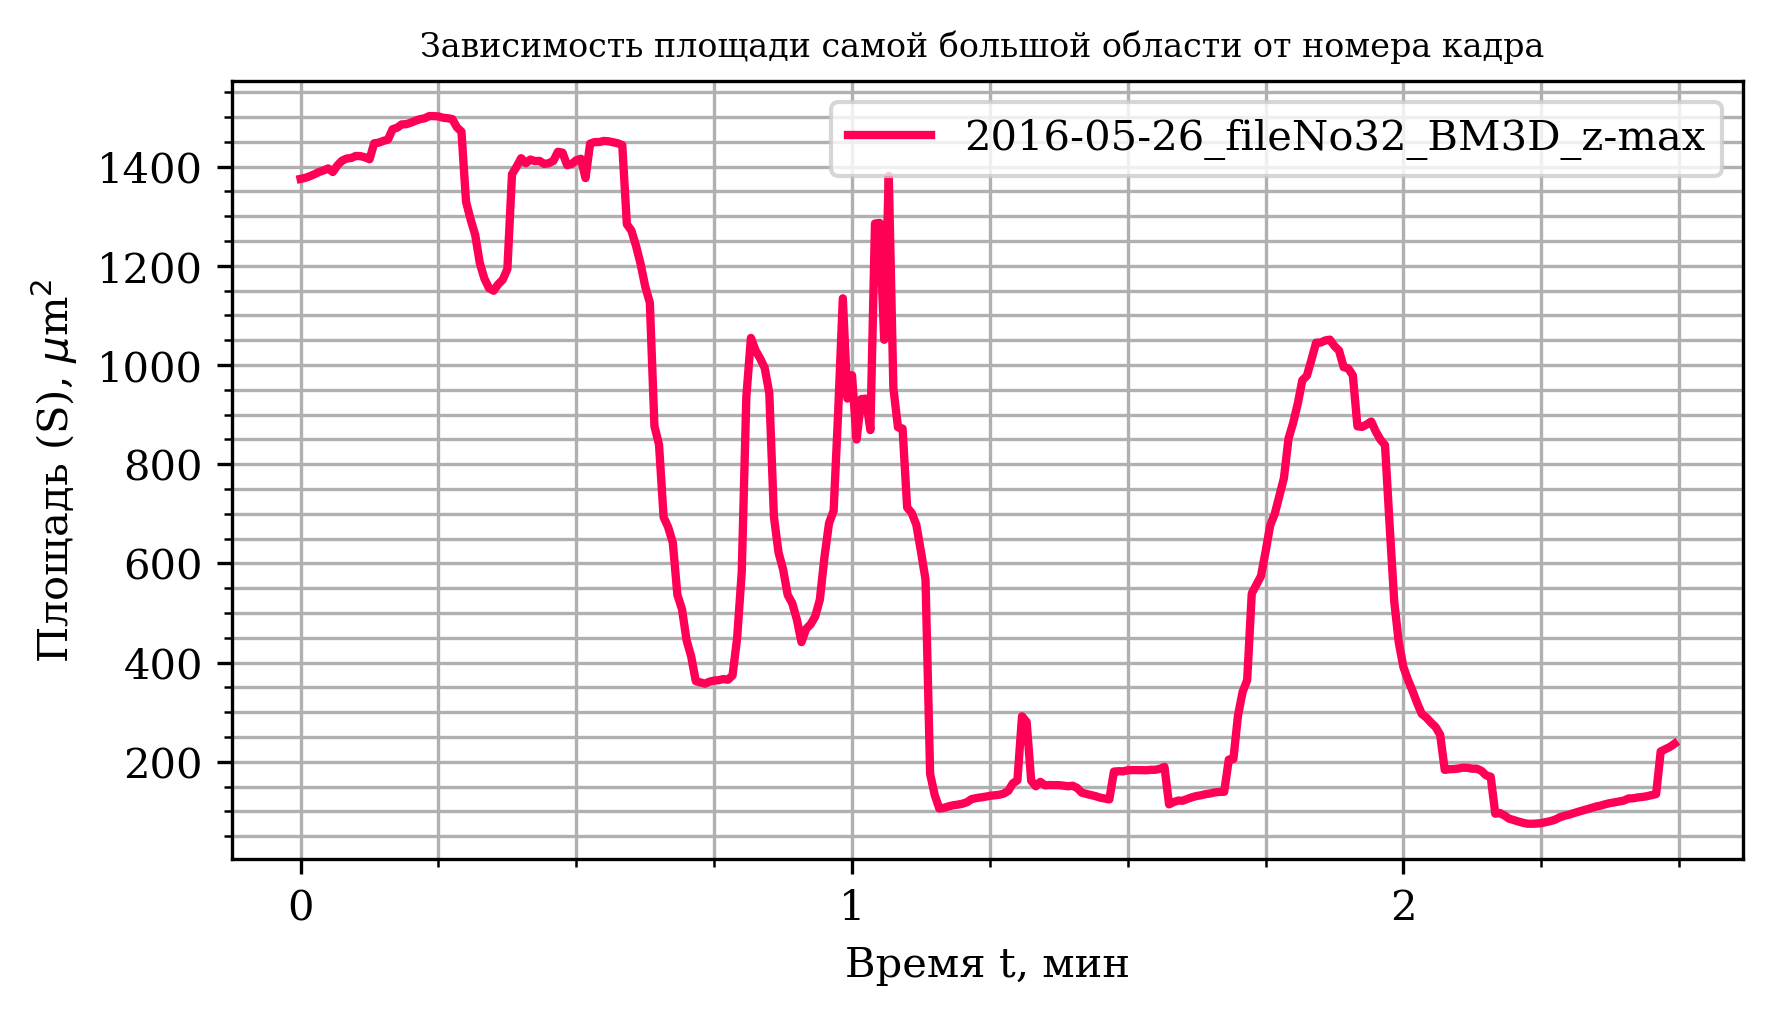

In [14]:
file_for_func_to_func8.function_to_func8(df_ev=df_all[df_all.file_path.str.contains('event')])